In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv(f"/content/drive/MyDrive/Copy of MBTI top 1000.csv", encoding='latin',index_col=0)
df.dropna()
df.reset_index(drop=True)
cols = ['averagerating','numvotes','lead_votes','secondlead_votes']
df[cols].describe()

averagerating      numvotes   lead_votes  secondlead_votes
count    1000.000000  1.000000e+03  1000.000000       1000.000000
mean        7.119600  3.795006e+05   483.828000        343.988000
std         0.873601  3.789258e+05   689.808571        493.300877
min         1.900000  1.185960e+05     3.000000          3.000000
25%         6.500000  1.592780e+05   124.000000        101.750000
50%         7.150000  2.299345e+05   213.500000        179.500000
75%         7.725000  3.875650e+05   454.000000        360.000000
max         9.300000  2.934011e+06  5340.000000       5942.000000

# OVERALL

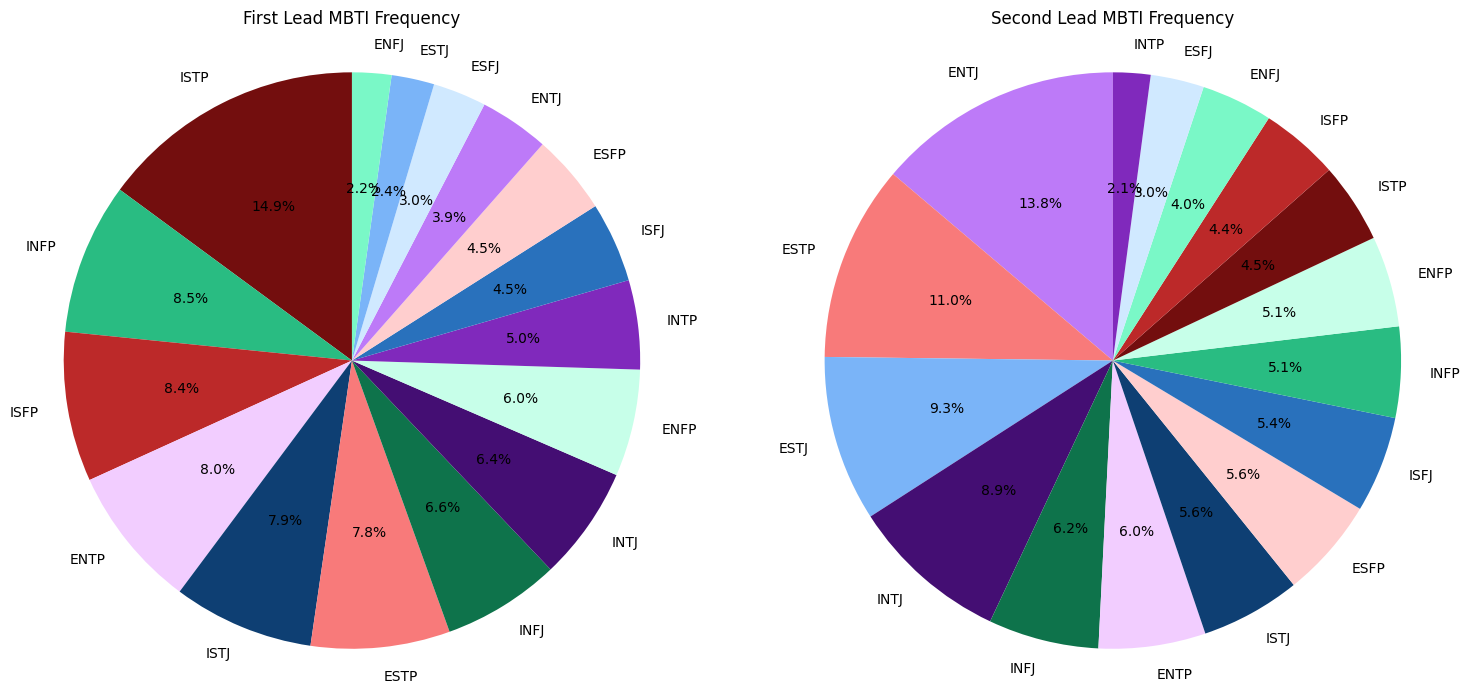

In [4]:

# these are the hex colours i assigned to the data types
colour_mapping = {
    'INFJ':'#0E734B',
    'INFP':'#29BC82',
    'ENFJ':'#7AF8C7',
    'ENFP':'#C7FFE9',
    'INTJ':'#440E73',
    'INTP':'#8029BC',
    'ENTJ':'#BD7AF8',
    'ENTP':'#F2CDFF',
    'ISTJ':'#0E3F73',
    'ISFJ':'#2971BC',
    'ESTJ':'#7AB4F8',
    'ESFJ':'#D0E9FF',
    'ISTP':'#730E0E',
    'ISFP':'#BC2929',
    'ESTP':'#F87A7A',
    'ESFP':'#FFCECE'
}

# Step 1: Calculate the frequency count for each MBTI type for both first and second leads
lead_mbti_counts = df['lead_MBTI'].value_counts()
second_lead_mbti_counts = df['secondlead_MBTI'].value_counts()

# Step 2: Prepare colors based on the MBTI types using the colour_mapping
lead_colors = [colour_mapping[mbti] for mbti in lead_mbti_counts.index]
second_lead_colors = [colour_mapping[mbti] for mbti in second_lead_mbti_counts.index]

# Step 3: Create subplots for the pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# First Lead Pie Chart
ax1.pie(
    lead_mbti_counts,
    labels=lead_mbti_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=lead_colors
)
ax1.set_title('First Lead MBTI Frequency\n')

# Second Lead Pie Chart
ax2.pie(
    second_lead_mbti_counts,
    labels=second_lead_mbti_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=second_lead_colors
)
ax2.set_title('Second Lead MBTI Frequency\n')

# Ensure the pie charts are displayed as circles
ax1.axis('equal')
ax2.axis('equal')

# Display the plot
plt.show()


First Lead's Individual Letter Analysis


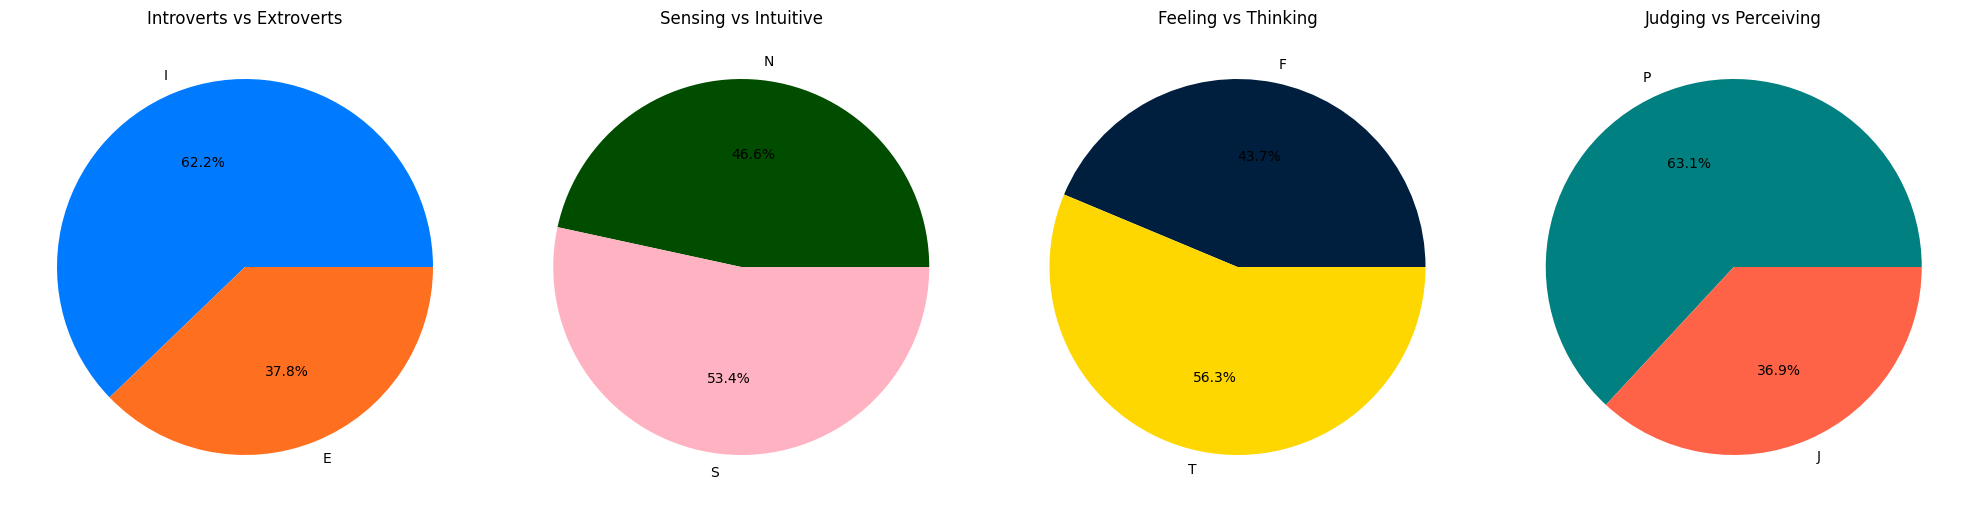

In [5]:

leadmbti = Counter(df['lead_MBTI'].dropna().astype(str).tolist())
leadmbti = leadmbti.most_common()

l1 = {'I':0,'E':0}
l2 = {'N':0,'S':0}
l3 = {'F':0,'T':0}
l4 = {'P':0,'J':0}

for mbti,v in leadmbti:
    l1[mbti[0]]+=v
    l2[mbti[1]]+=v
    l3[mbti[2]]+=v
    l4[mbti[3]]+=v

fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

colors_l1 = ['#007BFF', '#FF6F20']  # I and E
colors_l2 = ['#004D00', '#FFB2C1']  # N and S
colors_l3 = ['#001F3F', '#FFD700']  # T and F
colors_l4 = ['#008080', '#FF6347']  # J and P

print("First Lead's Individual Letter Analysis")
# Plot each pie chart in the corresponding subplot
axs[0].pie(l1.values(), labels=l1.keys(), autopct='%1.1f%%',colors=colors_l1)
axs[0].set_title("Introverts vs Extroverts")

axs[1].pie(l2.values(), labels=l2.keys(), autopct='%1.1f%%',colors=colors_l2)
axs[1].set_title("Sensing vs Intuitive")

axs[2].pie(l3.values(), labels=l3.keys(), autopct='%1.1f%%',colors=colors_l3)
axs[2].set_title("Feeling vs Thinking")

axs[3].pie(l4.values(), labels=l4.keys(), autopct='%1.1f%%',colors=colors_l4)
axs[3].set_title("Judging vs Perceiving")

# Adjust layout to make sure there's no overlap
plt.tight_layout()

Second Lead's Individual Letter Analysis


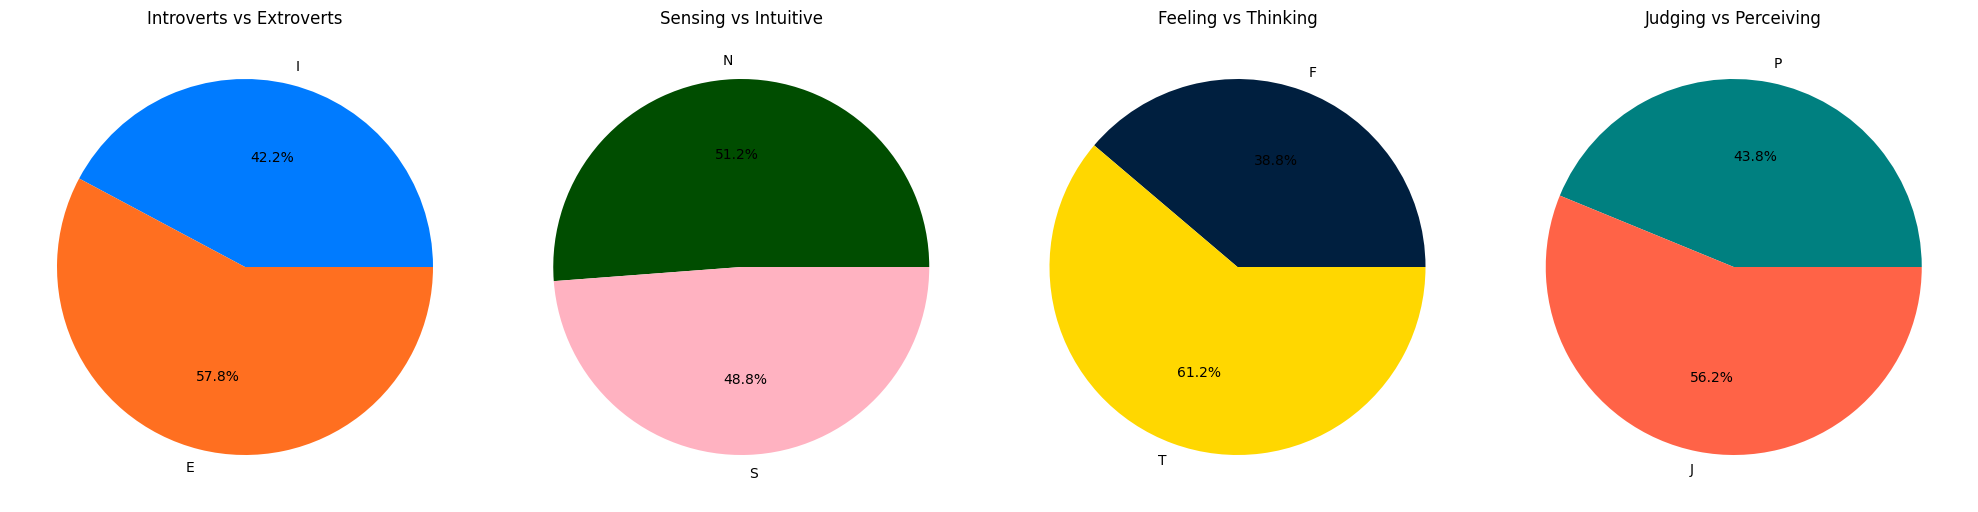

In [6]:

leadmbti = Counter(df['secondlead_MBTI'].dropna().astype(str).tolist())
leadmbti = leadmbti.most_common()

l1 = {'I':0,'E':0}
l2 = {'N':0,'S':0}
l3 = {'F':0,'T':0}
l4 = {'P':0,'J':0}

for mbti,v in leadmbti:
    l1[mbti[0]]+=v
    l2[mbti[1]]+=v
    l3[mbti[2]]+=v
    l4[mbti[3]]+=v

fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns

colors_l1 = ['#007BFF', '#FF6F20']  # I and E
colors_l2 = ['#004D00', '#FFB2C1']  # N and S
colors_l3 = ['#001F3F', '#FFD700']  # T and F
colors_l4 = ['#008080', '#FF6347']  # J and P

print("Second Lead's Individual Letter Analysis")
# Plot each pie chart in the corresponding subplot
axs[0].pie(l1.values(), labels=l1.keys(), autopct='%1.1f%%',colors=colors_l1)
axs[0].set_title("Introverts vs Extroverts")

axs[1].pie(l2.values(), labels=l2.keys(), autopct='%1.1f%%',colors=colors_l2)
axs[1].set_title("Sensing vs Intuitive")

axs[2].pie(l3.values(), labels=l3.keys(), autopct='%1.1f%%',colors=colors_l3)
axs[2].set_title("Feeling vs Thinking")

axs[3].pie(l4.values(), labels=l4.keys(), autopct='%1.1f%%',colors=colors_l4)
axs[3].set_title("Judging vs Perceiving")

# Adjust layout to make sure there's no overlap
plt.tight_layout()

In [7]:
mbticlass = {
    'analysts':{'INTJ','ENTJ','INTP','ENTP'},
    'diplomats':{'INFP','ENFP','INFJ','ENFJ'},
    'sentinels':{'ISTJ','ESTJ','ISFJ','ESFJ'},
    'explorers':{'ISFP','ESFP','ISTP','ESTP'}
}


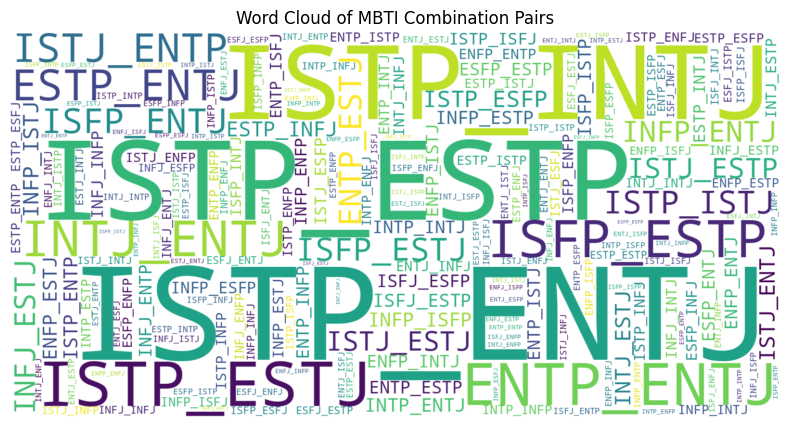

In [8]:
df['MBTI_pair'] = df['lead_MBTI'] + "_" + df['secondlead_MBTI']

from wordcloud import WordCloud

# Combine all values in 'MBTI_pair' into a single string
mbti_pairs_text = " ".join(df['MBTI_pair'])

# Generate the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(mbti_pairs_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of MBTI Combination Pairs')
plt.show()

# VOTES VS RATINGS

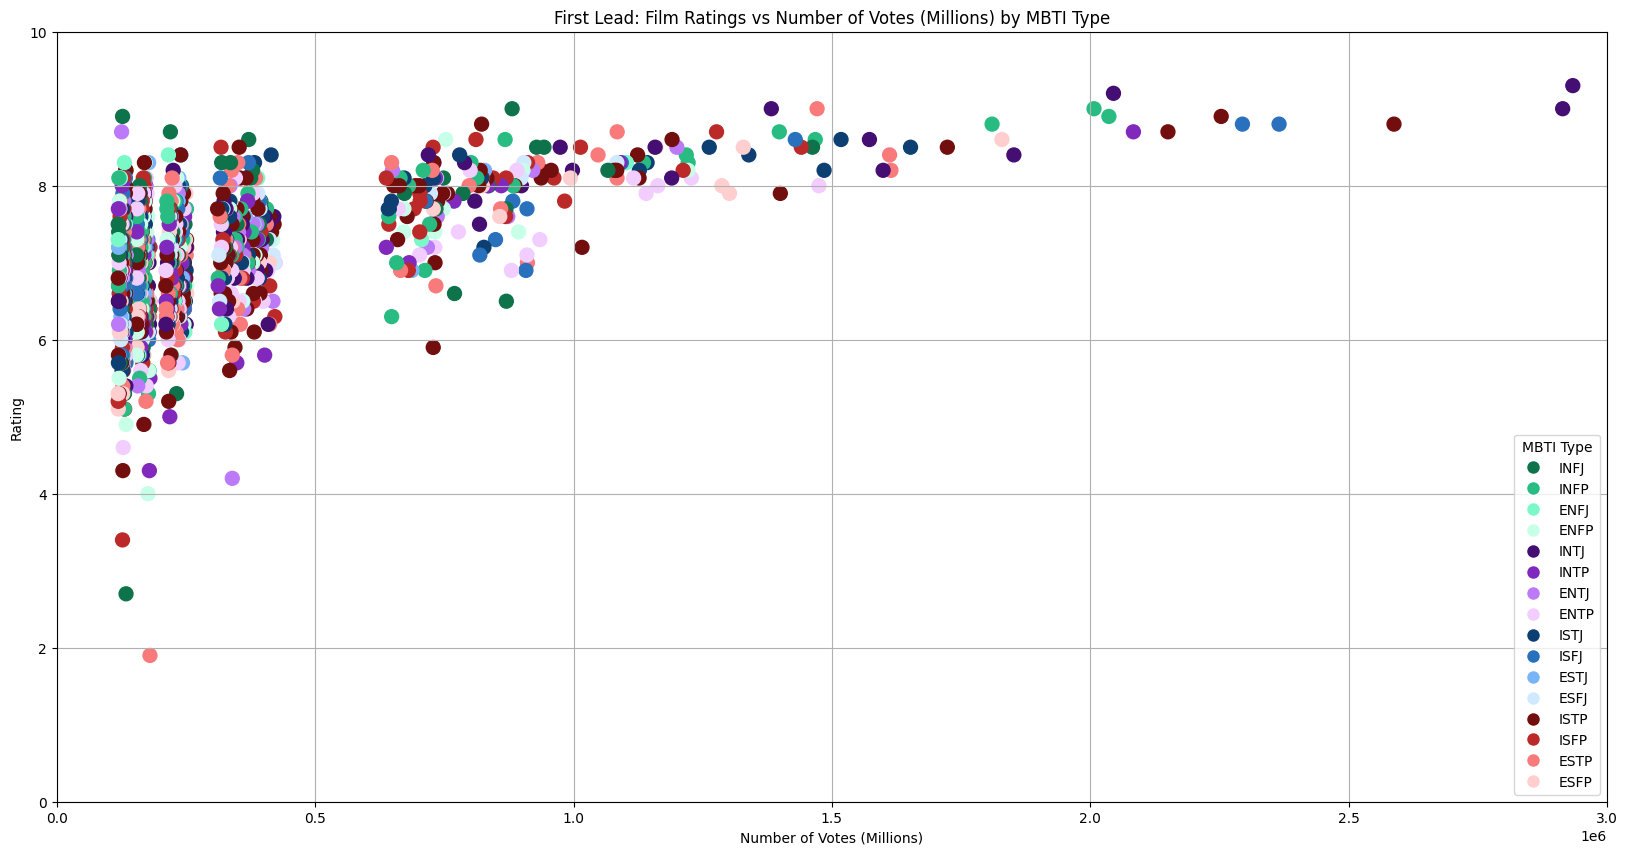

In [9]:
# ayt imma be creating a scatter plot for the first lead

color_titles = {
    'Introverts (I)': 'IEColour',
    'Extroverts (E)': 'IEColour',
    'Intuitive (N)': 'NSColour',
    'Sensing (S)': 'NSColour',
    'Thinking (T)': 'TFColour',
    'Feeling (F)': 'TFColour',
    'Judging (J)': 'JPColour',
    'Perceiving (P)': 'JPColour'
}

df['lead_colour'] = df['lead_MBTI'].map(colour_mapping)
df['secondlead_colour'] = df['secondlead_MBTI'].map(colour_mapping)

plt.figure(figsize=(20,10))
plt.scatter(data=df,x='numvotes',y='averagerating',c=df['lead_colour'].values,s=100)

plt.title('First Lead: Film Ratings vs Number of Votes (Millions) by MBTI Type')
plt.xlabel('Number of Votes (Millions)')
plt.ylabel('Rating')
plt.xlim(0,3000000)
plt.ylim(0,10)

#just me making a custom legend don't mind me :3
handles = [plt.Line2D([0], [0], marker='o', color='w', label=mbti, markerfacecolor=colour_mapping[mbti], markersize=10) for mbti in colour_mapping.keys()]
plt.legend(handles=handles, title='MBTI Type')

plt.grid(True)
plt.show()

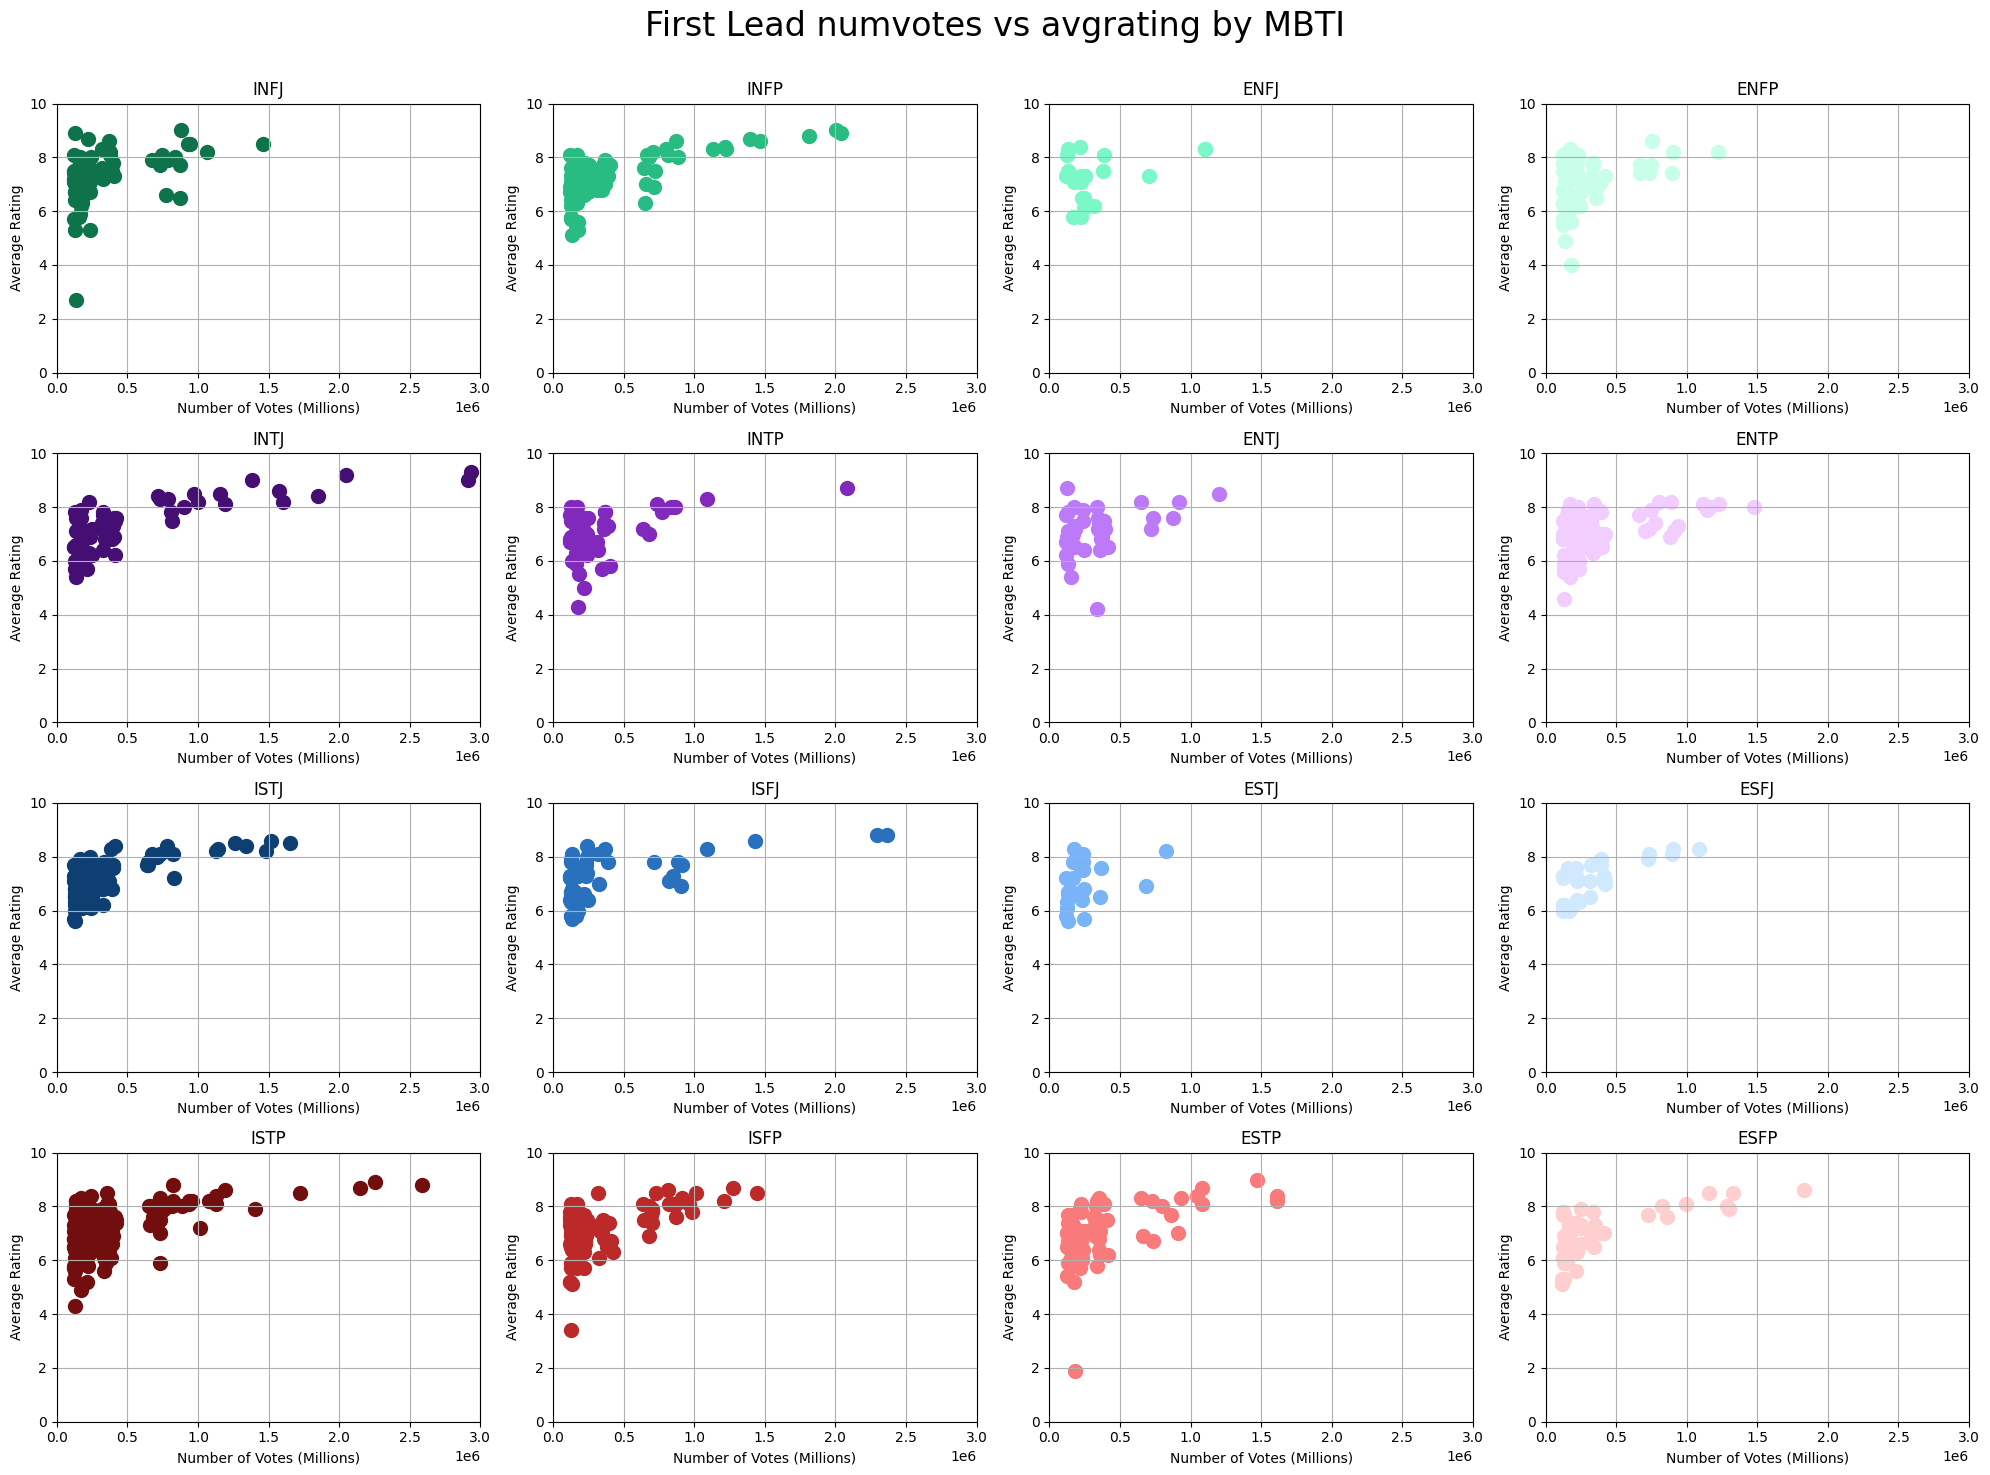

In [10]:
#now i'll create individual subplots for the first lead to see individual trends since it's so damn cluttered in the first one fr

# Create subplots
num_plots = len(colour_mapping)
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

fig.suptitle('First Lead numvotes vs avgrating by MBTI\n', fontsize=24)

# Generate scatter plots for each MBTI type
for idx, (mbti, color) in enumerate(colour_mapping.items()):
    subset = df[df['lead_MBTI'] == mbti]

    # If there are no points for this MBTI type, continue
    if subset.empty:
        continue

    axs[idx].scatter(subset['numvotes'], subset['averagerating'], c=color, s=100)
    axs[idx].set_title(mbti)
    axs[idx].set_xlabel('Number of Votes (Millions)')
    axs[idx].set_ylabel('Average Rating')
    axs[idx].grid(True)
    axs[idx].set_xlim(0, 3000000)
    axs[idx].set_ylim(0,10)

# Adjust layout
plt.tight_layout()
plt.show()

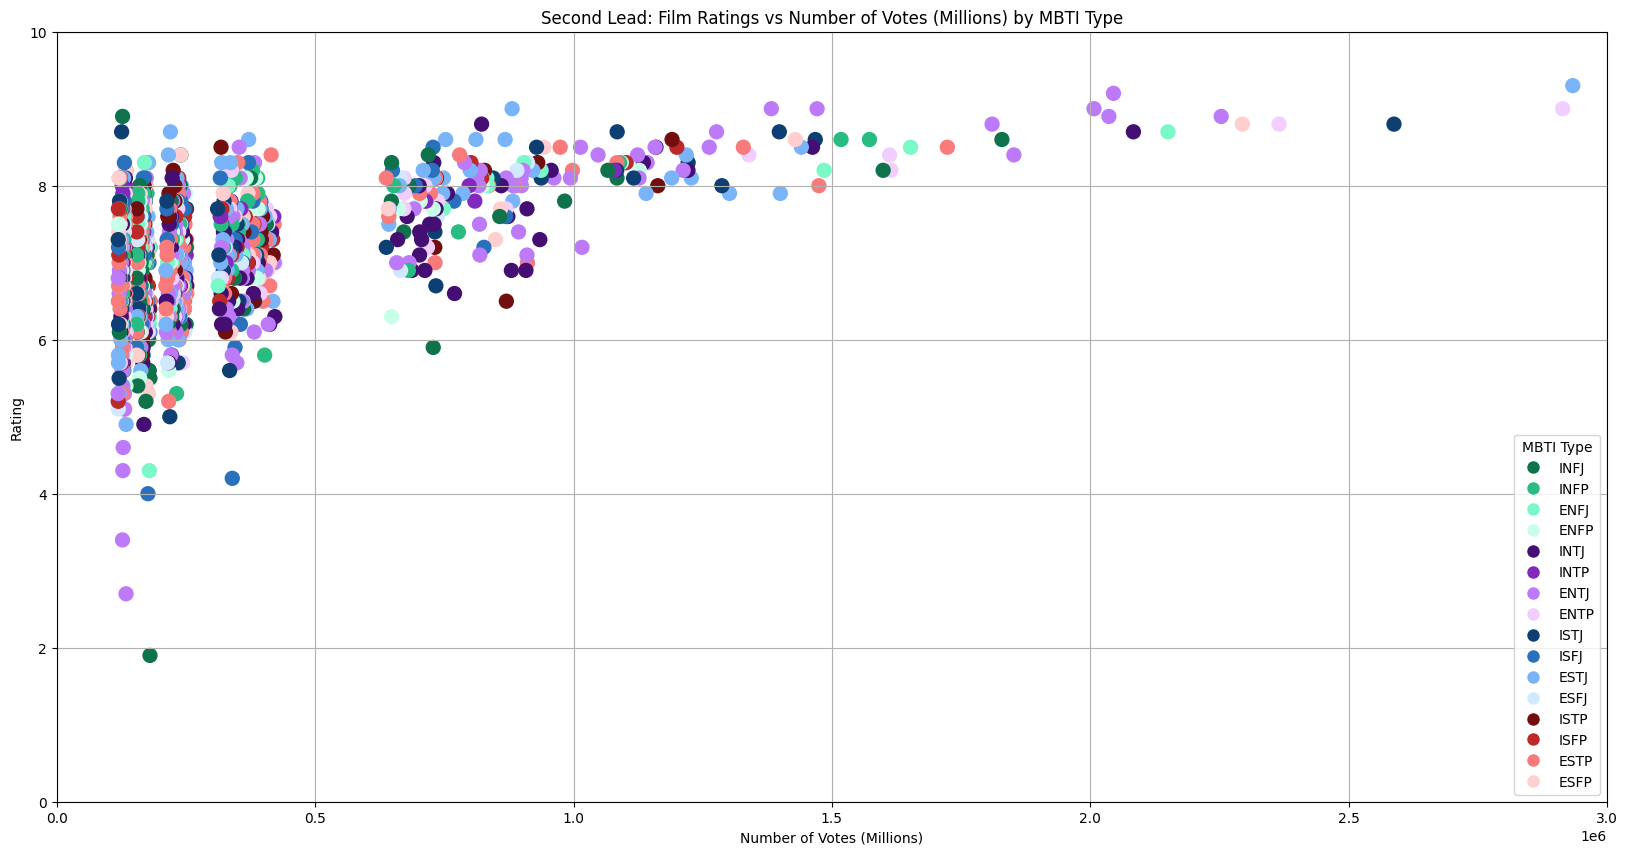

In [11]:
#repeating the same for the second lead character so i'm first building a cluttered af scatter plot

df['secondlead_colour'] = df['secondlead_MBTI'].map(colour_mapping)

plt.figure(figsize=(20,10))
plt.scatter(data=df,x='numvotes',y='averagerating',c=df['secondlead_colour'].values,s=100)

plt.title('Second Lead: Film Ratings vs Number of Votes (Millions) by MBTI Type')
plt.xlabel('Number of Votes (Millions)')
plt.ylabel('Rating')
plt.xlim(0,3000000)
plt.ylim(0,10)

handles = [plt.Line2D([0], [0], marker='o', color='w', label=mbti, markerfacecolor=colour_mapping[mbti], markersize=10) for mbti in colour_mapping.keys()]
plt.legend(handles=handles, title='MBTI Type')

plt.grid(True)
plt.show()

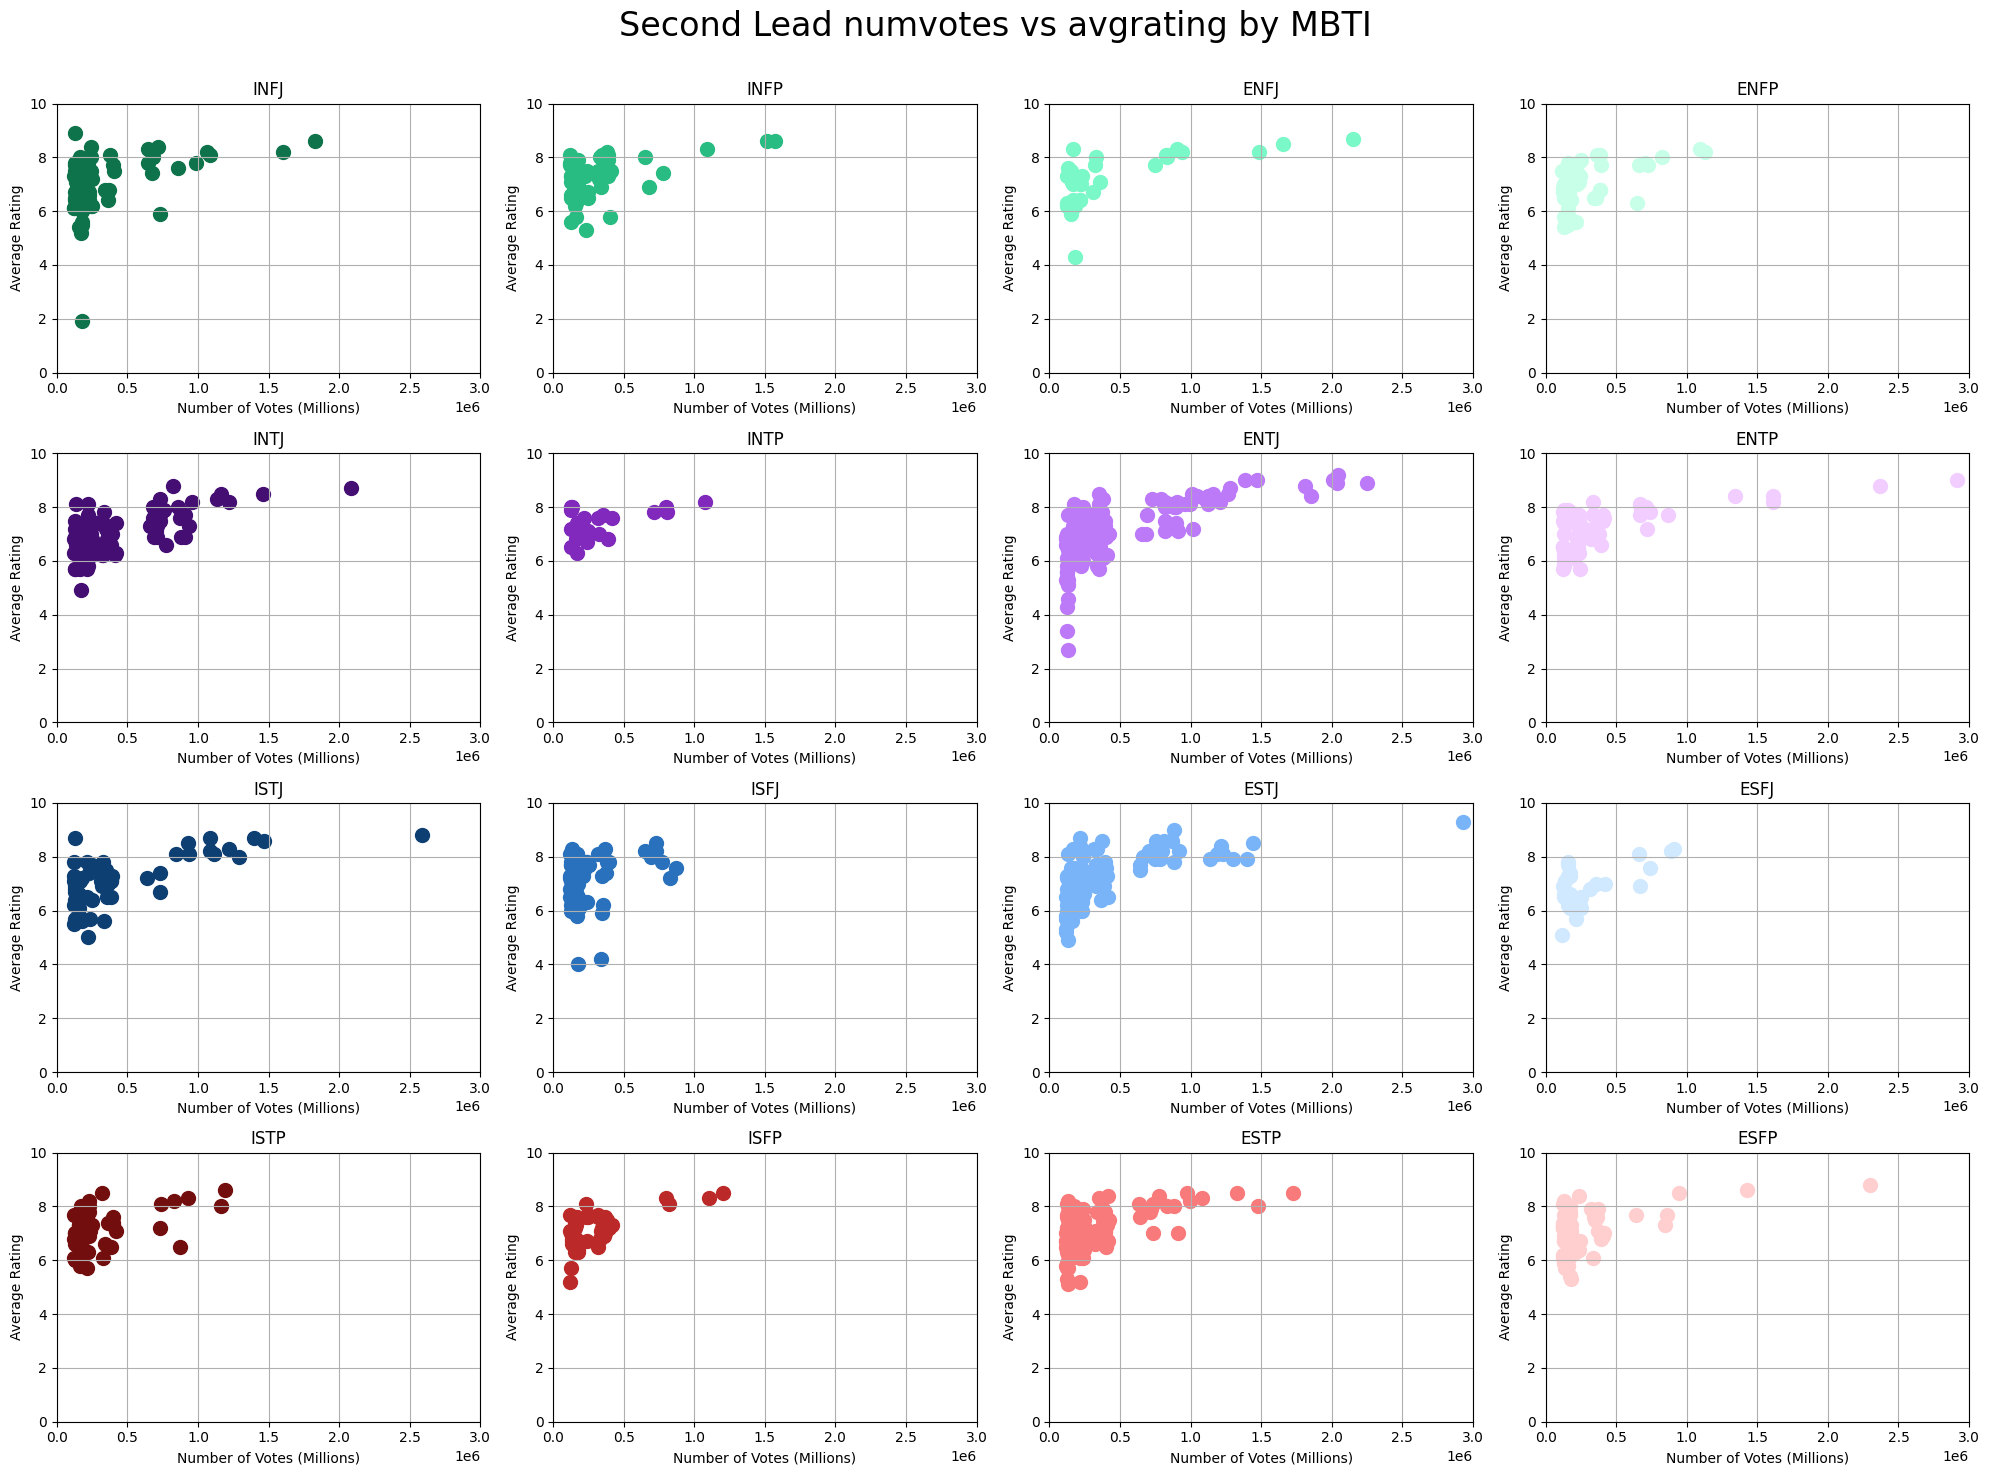

In [12]:
# creating the same subplots but for the second lead

# Create subplots
num_plots = len(colour_mapping)
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

fig.suptitle('Second Lead numvotes vs avgrating by MBTI\n', fontsize=24)

# Generate scatter plots for each MBTI type
for idx, (mbti, color) in enumerate(colour_mapping.items()):
    subset = df[df['secondlead_MBTI'] == mbti]

    # If there are no points for this MBTI type, continue
    if subset.empty:
        continue

    axs[idx].scatter(subset['numvotes'], subset['averagerating'], c=color, s=100)
    axs[idx].set_title(mbti)
    axs[idx].set_xlabel('Number of Votes (Millions)')
    axs[idx].set_ylabel('Average Rating')
    axs[idx].grid(True)
    axs[idx].set_xlim(0, 3000000)
    axs[idx].set_ylim(0,10)

# Adjust layout
plt.tight_layout()
plt.show()

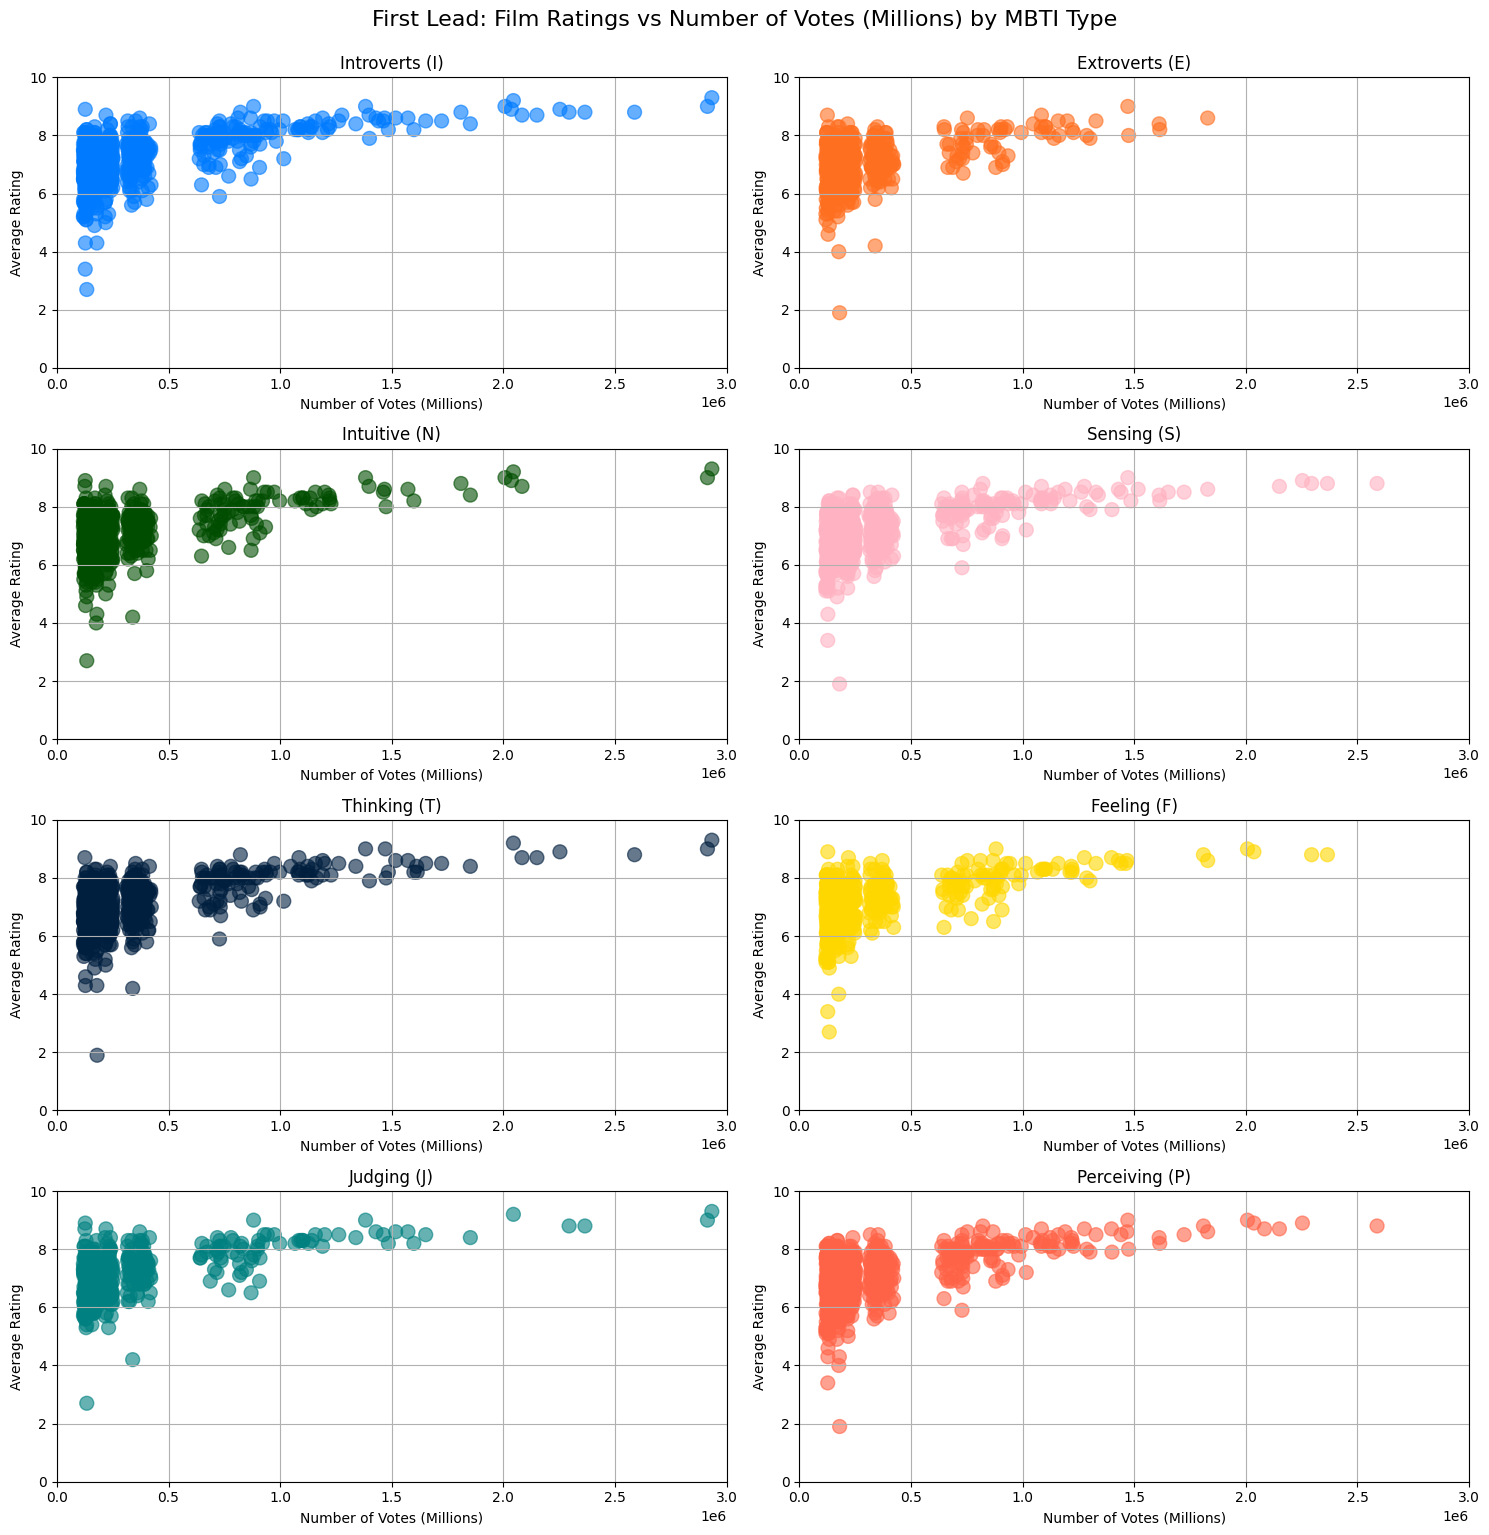

In [13]:
# ayt now imma move onto individual letter analysis for the lead mbti based on numvotes and avgrating

color_titles = {
    'Introverts (I)': 'IEColour',
    'Extroverts (E)': 'IEColour',
    'Intuitive (N)': 'NSColour',
    'Sensing (S)': 'NSColour',
    'Thinking (T)': 'TFColour',
    'Feeling (F)': 'TFColour',
    'Judging (J)': 'JPColour',
    'Perceiving (P)': 'JPColour'
}

df['I/E'] = df['lead_MBTI'].apply(lambda x: 'I' if x[0] == 'I' else 'E')
df['N/S'] = df['lead_MBTI'].apply(lambda x: 'N' if x[1] == 'N' else 'S')
df['T/F'] = df['lead_MBTI'].apply(lambda x: 'T' if x[2] == 'T' else 'F')
df['J/P'] = df['lead_MBTI'].apply(lambda x: 'J' if x[3] == 'J' else 'P')

df['IEColour'] = df['I/E'].map({'I':'#007BFF','E':'#FF6F20'})
df['NSColour'] = df['N/S'].map({'N':'#004D00','S':'#FFB2C1'})
df['TFColour'] = df['T/F'].map({'T':'#001F3F','F':'#FFD700'})
df['JPColour'] = df['J/P'].map({'J':'#008080','P':'#FF6347'})

# Create subsets for each MBTI type
mbti_types = ['I', 'E', 'N', 'S', 'T', 'F', 'J', 'P']
visuals = {
    'Introverts (I)': df[df['lead_MBTI'].str[0] == 'I'],
    'Extroverts (E)': df[df['lead_MBTI'].str[0] == 'E'],
    'Intuitive (N)': df[df['lead_MBTI'].str[1] == 'N'],
    'Sensing (S)': df[df['lead_MBTI'].str[1] == 'S'],
    'Thinking (T)': df[df['lead_MBTI'].str[2] == 'T'],
    'Feeling (F)': df[df['lead_MBTI'].str[2] == 'F'],
    'Judging (J)': df[df['lead_MBTI'].str[3] == 'J'],
    'Perceiving (P)': df[df['lead_MBTI'].str[3] == 'P']
}

# Plotting all types
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

for n, (title, data) in enumerate(visuals.items()):
    color_col = color_titles[title]
    axs[n].scatter(data['numvotes'], data['averagerating'], c=data[color_col], s=100, alpha=0.6)
    axs[n].set_title(title)
    axs[n].set_xlabel('Number of Votes (Millions)')
    axs[n].set_ylabel('Average Rating')
    axs[n].grid(True)
    axs[n].set_xlim(0, 3000000)
    axs[n].set_ylim(0,10)

# Adjust layout
plt.tight_layout()
plt.suptitle('First Lead: Film Ratings vs Number of Votes (Millions) by MBTI Type', fontsize=16, y=1.02)
plt.show()

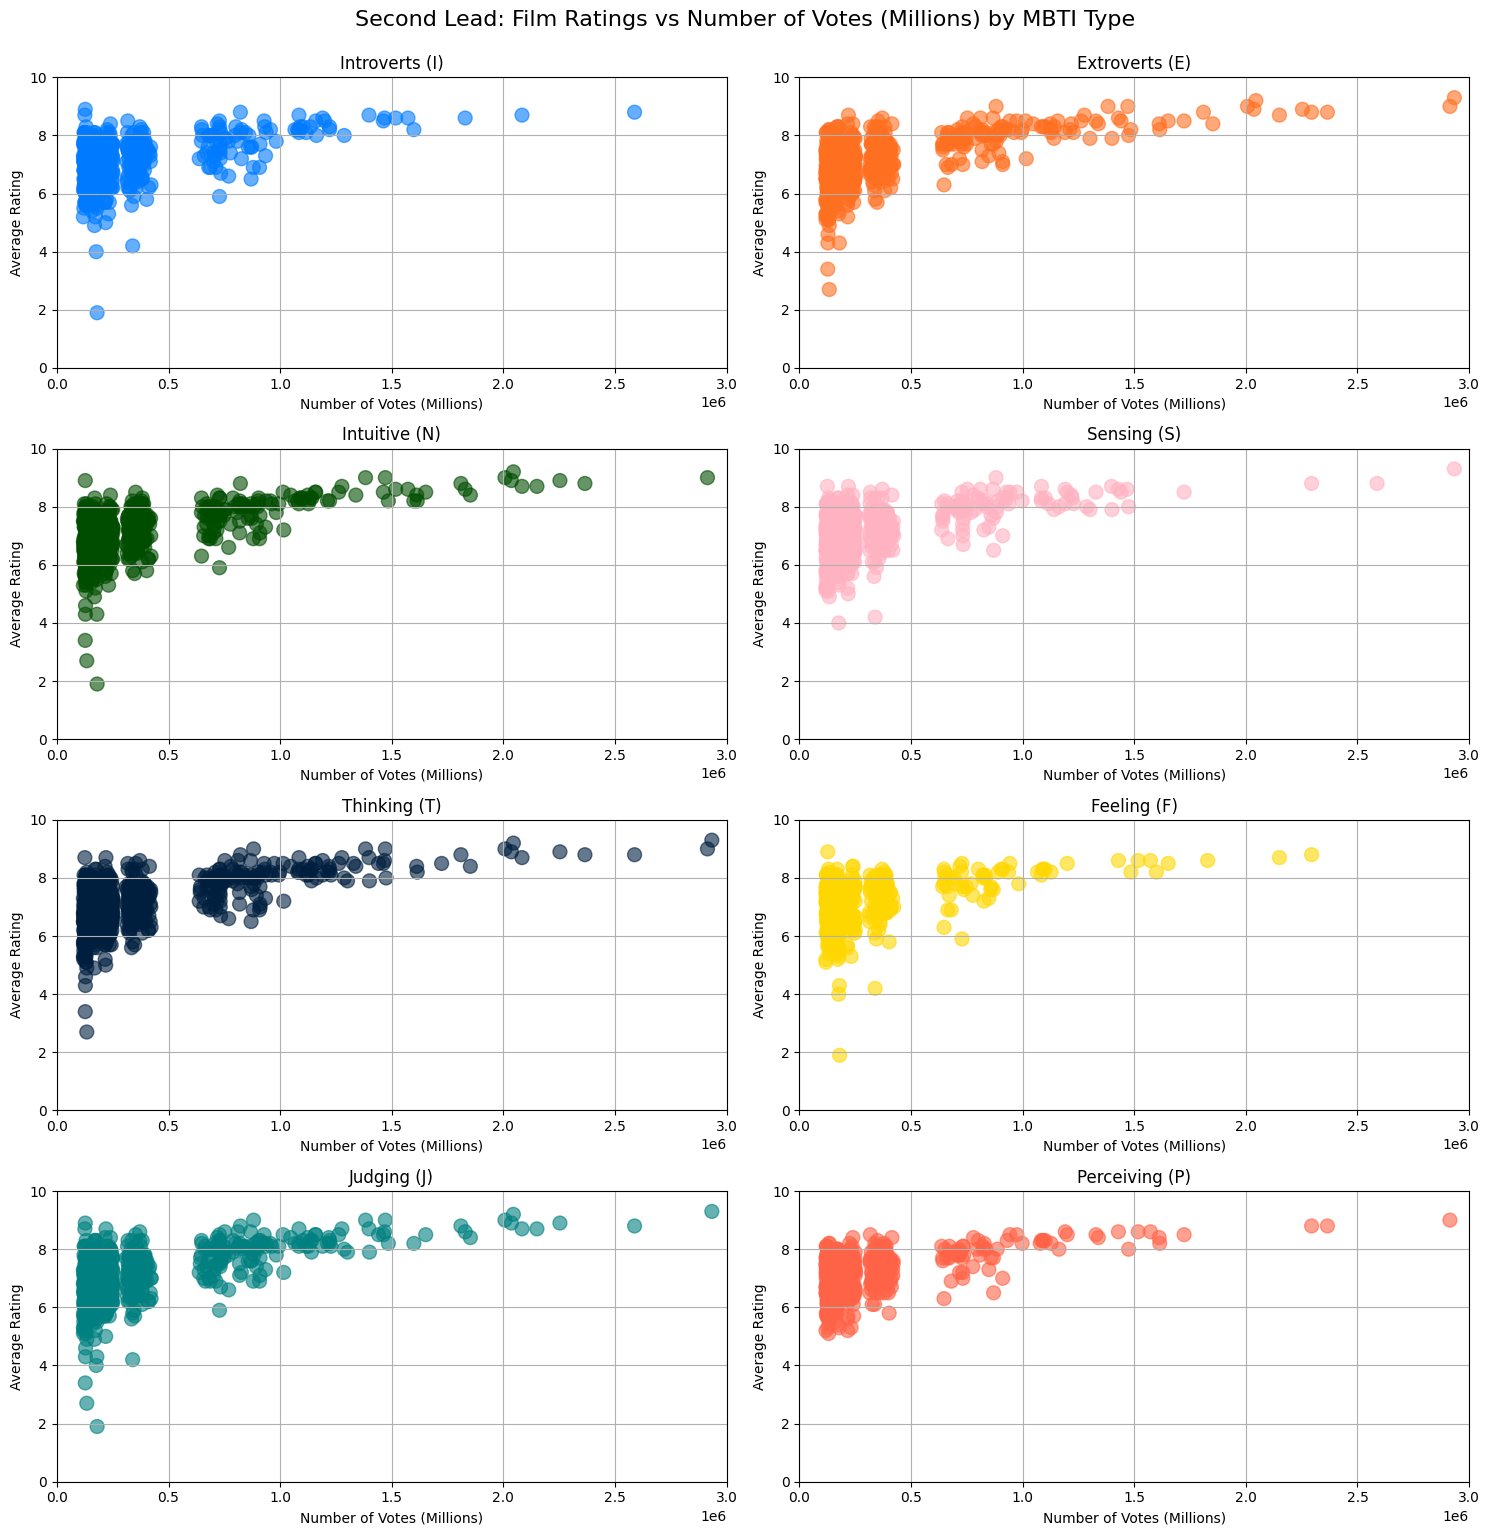

In [14]:
#and now repeating the same for the second leaddd

df['I/E'] = df['secondlead_MBTI'].apply(lambda x: 'I' if x[0] == 'I' else 'E')
df['N/S'] = df['secondlead_MBTI'].apply(lambda x: 'N' if x[1] == 'N' else 'S')
df['T/F'] = df['secondlead_MBTI'].apply(lambda x: 'T' if x[2] == 'T' else 'F')
df['J/P'] = df['secondlead_MBTI'].apply(lambda x: 'J' if x[3] == 'J' else 'P')

df['IEColour'] = df['I/E'].map({'I':'#007BFF','E':'#FF6F20'})
df['NSColour'] = df['N/S'].map({'N':'#004D00','S':'#FFB2C1'})
df['TFColour'] = df['T/F'].map({'T':'#001F3F','F':'#FFD700'})
df['JPColour'] = df['J/P'].map({'J':'#008080','P':'#FF6347'})

visuals = {
    'Introverts (I)': df[df['secondlead_MBTI'].str[0] == 'I'],
    'Extroverts (E)': df[df['secondlead_MBTI'].str[0] == 'E'],
    'Intuitive (N)': df[df['secondlead_MBTI'].str[1] == 'N'],
    'Sensing (S)': df[df['secondlead_MBTI'].str[1] == 'S'],
    'Thinking (T)': df[df['secondlead_MBTI'].str[2] == 'T'],
    'Feeling (F)': df[df['secondlead_MBTI'].str[2] == 'F'],
    'Judging (J)': df[df['secondlead_MBTI'].str[3] == 'J'],
    'Perceiving (P)': df[df['secondlead_MBTI'].str[3] == 'P']
}

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

for n, (title, data) in enumerate(visuals.items()):
    color_col = color_titles[title]
    axs[n].scatter(data['numvotes'], data['averagerating'], c=data[color_col], s=100, alpha=0.6)
    axs[n].set_title(title)
    axs[n].set_xlabel('Number of Votes (Millions)')
    axs[n].set_ylabel('Average Rating')
    axs[n].grid(True)
    axs[n].set_xlim(0, 3000000)
    axs[n].set_ylim(0,10)

# Adjust layout
plt.tight_layout()
plt.suptitle('Second Lead: Film Ratings vs Number of Votes (Millions) by MBTI Type', fontsize=16, y=1.02)
plt.show()

# GENRES

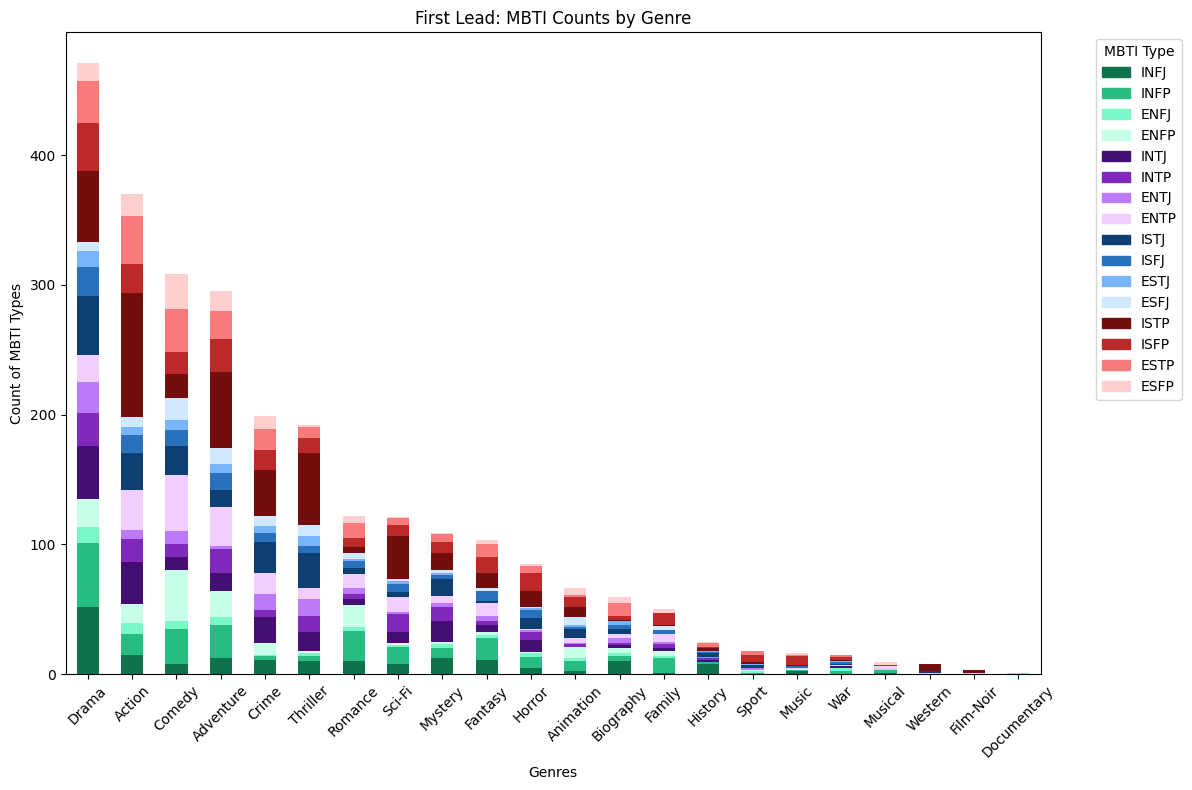

In [15]:
#creating a stacked bar charts to show mbti types based on movie genres: FIRST LEADDDDDDDDD

# Step 1: Create a new DataFrame without modifying the original
genredf = df.copy()

# Step 2: Split genres and explode the DataFrame
genredf['genres'] = genredf['genres'].str.split(',')
genredf_exploded = genredf.explode('genres')

# Step 3: Group by genres and lead_MBTI to count occurrences
genre_counts = genredf_exploded.groupby(['genres', 'lead_MBTI']).size().unstack(fill_value=0)

# Step 4: Sort the DataFrame by total counts for each genre
genre_counts['Total'] = genre_counts.sum(axis=1)
genre_counts_sorted = genre_counts.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# Step 5: Reorder columns to match the colour mapping
ordered_columns = [mbti for mbti in colour_mapping.keys() if mbti in genre_counts_sorted.columns]
genre_counts_ordered = genre_counts_sorted[ordered_columns]

# Step 6: Create a color palette based on the colour_mapping
color_palette = [colour_mapping[mbti] for mbti in ordered_columns]

# Step 7: Plotting the stacked bar chart
ax = genre_counts_ordered.plot(kind='bar', stacked=True, figsize=(12, 8), color=color_palette)

# Adding labels and title
plt.title('First Lead: MBTI Counts by Genre')
plt.xlabel('Genres')
plt.ylabel('Count of MBTI Types')

# Custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=colour_mapping[mbti]) for mbti in colour_mapping.keys() if mbti in ordered_columns]
plt.legend(handles, colour_mapping.keys(), title='MBTI Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

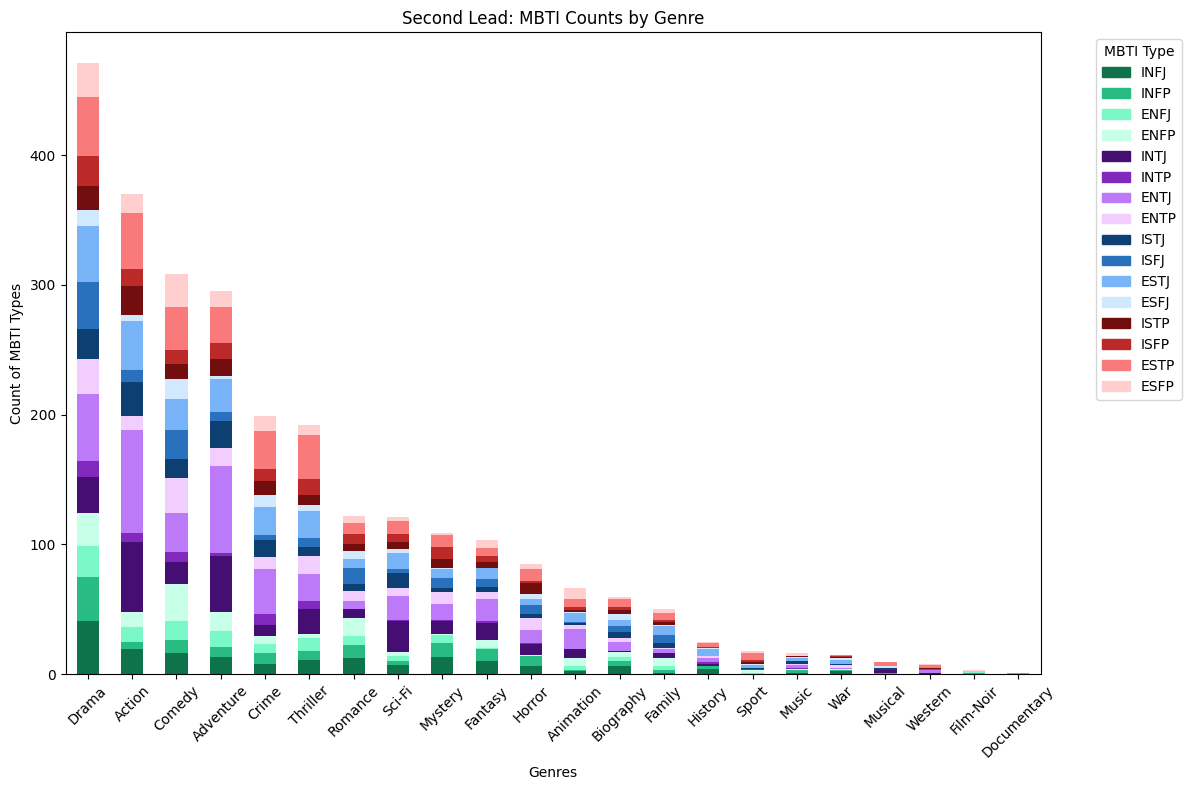

In [16]:
#creating a stacked bar charts to show mbti types based on movie genres: SECONDDDD LEADDDDDDDDD

# Step 1: Create a new DataFrame without modifying the original
genredf = df.copy()

# Step 2: Split genres and explode the DataFrame
genredf['genres'] = genredf['genres'].str.split(',')
genredf_exploded = genredf.explode('genres')

# Step 3: Group by genres and lead_MBTI to count occurrences
genre_counts = genredf_exploded.groupby(['genres', 'secondlead_MBTI']).size().unstack(fill_value=0)

# Step 4: Sort the DataFrame by total counts for each genre
genre_counts['Total'] = genre_counts.sum(axis=1)
genre_counts_sorted = genre_counts.sort_values(by='Total', ascending=False).drop('Total', axis=1)

# Step 5: Reorder columns to match the colour mapping
ordered_columns = [mbti for mbti in colour_mapping.keys() if mbti in genre_counts_sorted.columns]
genre_counts_ordered = genre_counts_sorted[ordered_columns]

# Step 6: Create a color palette based on the colour_mapping
color_palette = [colour_mapping[mbti] for mbti in ordered_columns]

# Step 7: Plotting the stacked bar chart
ax = genre_counts_ordered.plot(kind='bar', stacked=True, figsize=(12, 8), color=color_palette)

# Adding labels and title
plt.title('Second Lead: MBTI Counts by Genre')
plt.xlabel('Genres')
plt.ylabel('Count of MBTI Types')

# Custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=colour_mapping[mbti]) for mbti in colour_mapping.keys() if mbti in ordered_columns]
plt.legend(handles, colour_mapping.keys(), title='MBTI Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

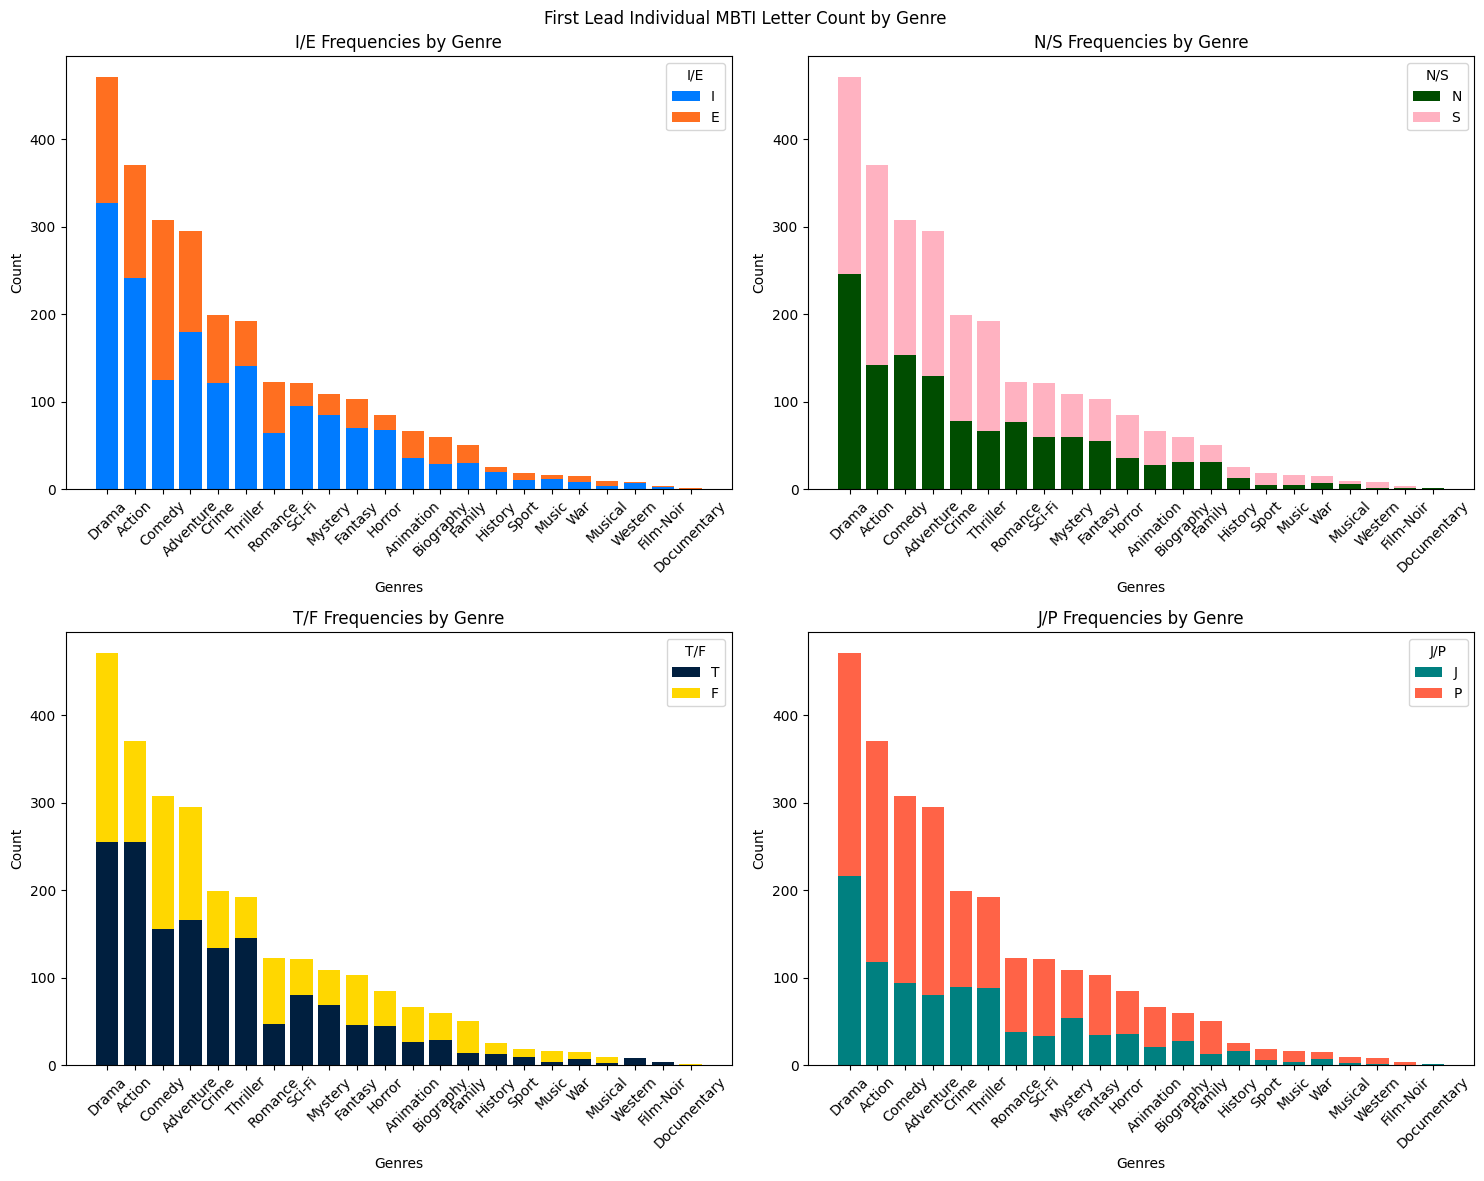

In [17]:
# trying to analyze individual letters of MBTI by genres

# Step 1: Create a new DataFrame without modifying the original
genredf = df.copy()

# Step 2: Split genres and explode the DataFrame
genredf['genres'] = genredf['genres'].str.split(',')
genredf_exploded = genredf.explode('genres')

# Step 3: Split the MBTI types into individual letters
genredf_exploded['I/E'] = genredf_exploded['lead_MBTI'].apply(lambda x: 'I' if x[0] == 'I' else 'E')
genredf_exploded['N/S'] = genredf_exploded['lead_MBTI'].apply(lambda x: 'N' if x[1] == 'N' else 'S')
genredf_exploded['T/F'] = genredf_exploded['lead_MBTI'].apply(lambda x: 'T' if x[2] == 'T' else 'F')
genredf_exploded['J/P'] = genredf_exploded['lead_MBTI'].apply(lambda x: 'J' if x[3] == 'J' else 'P')

# Define color mappings for each dimension
color_mappings = {
    'I/E': {'I': '#007BFF', 'E': '#FF6F20'},
    'N/S': {'N': '#004D00', 'S': '#FFB2C1'},
    'T/F': {'T': '#001F3F', 'F': '#FFD700'},
    'J/P': {'J': '#008080', 'P': '#FF6347'}
}

# Step 4: Create stacked bar charts for each individual letter dimension by genre
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
axes = ax.flatten()
fig.suptitle("First Lead Individual MBTI Letter Count by Genre")
dimensions = ['I/E', 'N/S', 'T/F', 'J/P']

for i, dimension in enumerate(dimensions):
    # Group by genres and individual letters to count occurrences
    genre_counts = genredf_exploded.groupby(['genres', dimension]).size().unstack(fill_value=0)

    # Sort the DataFrame by total counts for each genre
    genre_counts['Total'] = genre_counts.sum(axis=1)
    genre_counts_sorted = genre_counts.sort_values(by='Total', ascending=False).drop('Total', axis=1)

    # Plot stacked bar chart for each letter dimension
    bottom = None
    for value, color in color_mappings[dimension].items():
        if value in genre_counts_sorted.columns:
            if bottom is None:
                axes[i].bar(genre_counts_sorted.index, genre_counts_sorted[value], color=color, label=value)
                bottom = genre_counts_sorted[value]
            else:
                axes[i].bar(genre_counts_sorted.index, genre_counts_sorted[value], bottom=bottom, color=color, label=value)
                bottom += genre_counts_sorted[value]

    # Set labels and title for the subplot
    axes[i].set_title(f'{dimension} Frequencies by Genre')
    axes[i].set_xlabel('Genres')
    axes[i].set_ylabel('Count')
    axes[i].legend(title=dimension)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


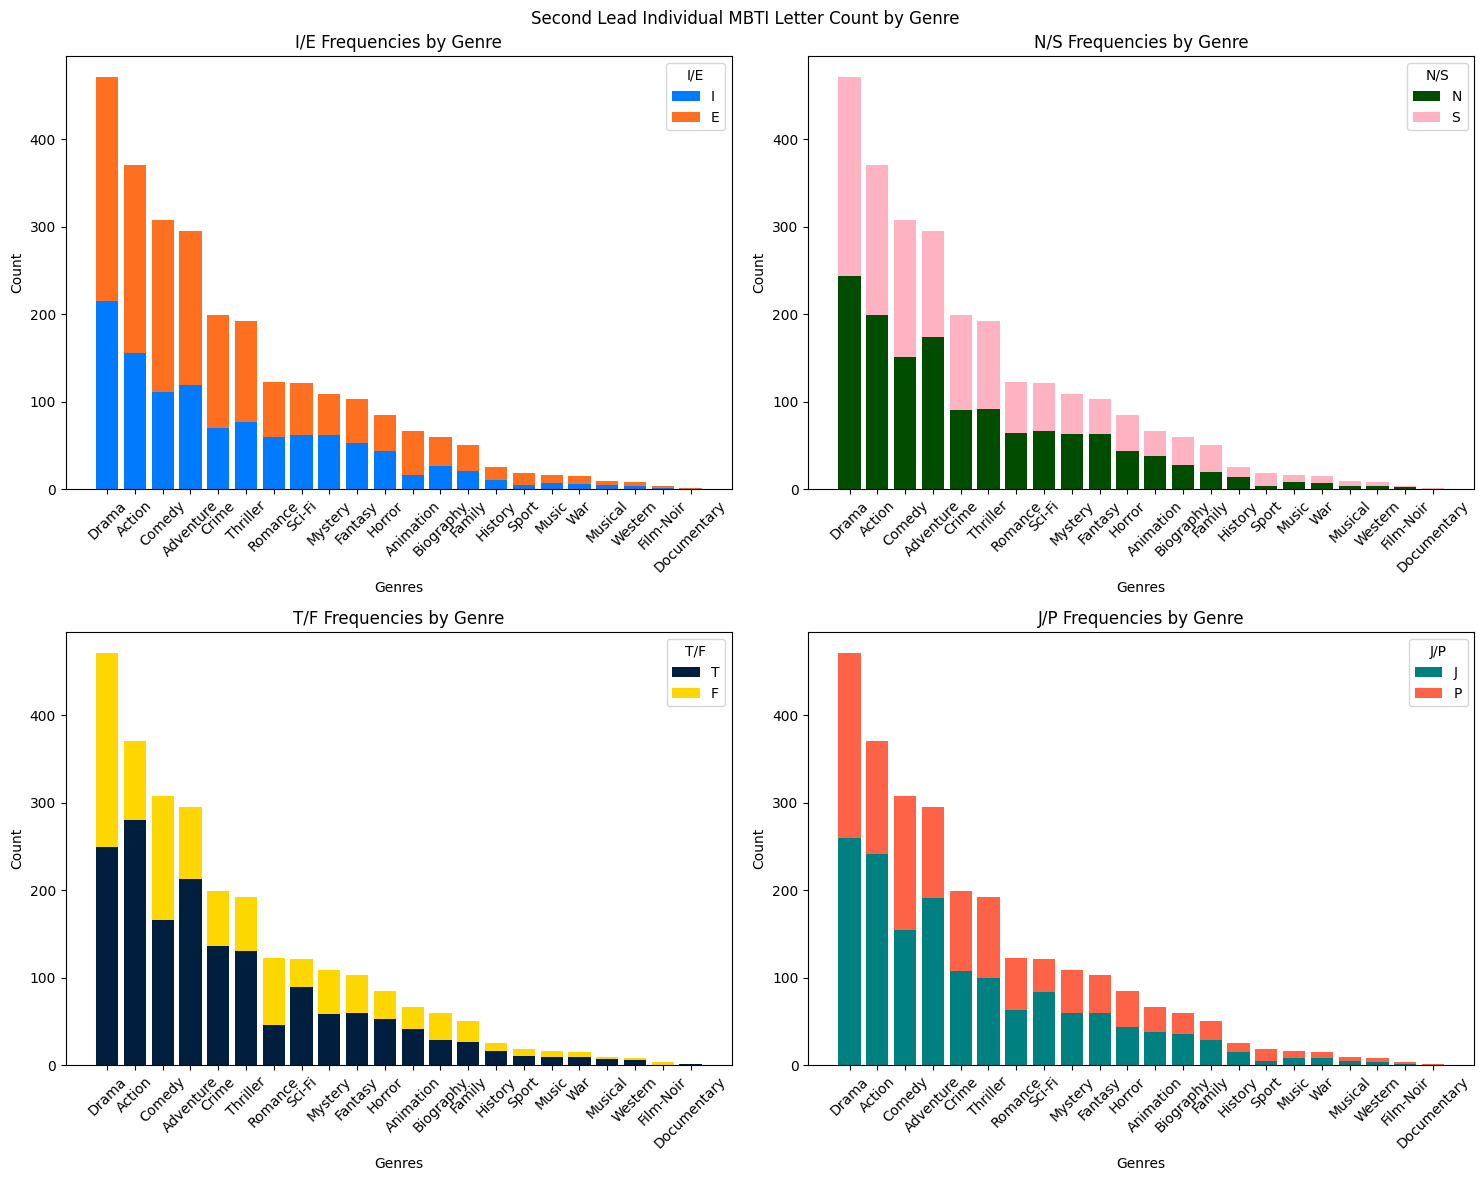

In [18]:
# Step 1: Create a new DataFrame without modifying the original
genredf = df.copy()

# Step 2: Split genres and explode the DataFrame
genredf['genres'] = genredf['genres'].str.split(',')
genredf_exploded = genredf.explode('genres')

# Step 3: Split the MBTI types into individual letters
genredf_exploded['I/E'] = genredf_exploded['secondlead_MBTI'].apply(lambda x: 'I' if x[0] == 'I' else 'E')
genredf_exploded['N/S'] = genredf_exploded['secondlead_MBTI'].apply(lambda x: 'N' if x[1] == 'N' else 'S')
genredf_exploded['T/F'] = genredf_exploded['secondlead_MBTI'].apply(lambda x: 'T' if x[2] == 'T' else 'F')
genredf_exploded['J/P'] = genredf_exploded['secondlead_MBTI'].apply(lambda x: 'J' if x[3] == 'J' else 'P')

# Define color mappings for each dimension
color_mappings = {
    'I/E': {'I': '#007BFF', 'E': '#FF6F20'},
    'N/S': {'N': '#004D00', 'S': '#FFB2C1'},
    'T/F': {'T': '#001F3F', 'F': '#FFD700'},
    'J/P': {'J': '#008080', 'P': '#FF6347'}
}

# Step 4: Create stacked bar charts for each individual letter dimension by genre
fig, ax = plt.subplots(2, 2, figsize=(15, 12))
axes = ax.flatten()
fig.suptitle("Second Lead Individual MBTI Letter Count by Genre")
dimensions = ['I/E', 'N/S', 'T/F', 'J/P']

for i, dimension in enumerate(dimensions):
    # Group by genres and individual letters to count occurrences
    genre_counts = genredf_exploded.groupby(['genres', dimension]).size().unstack(fill_value=0)

    # Sort the DataFrame by total counts for each genre
    genre_counts['Total'] = genre_counts.sum(axis=1)
    genre_counts_sorted = genre_counts.sort_values(by='Total', ascending=False).drop('Total', axis=1)

    # Plot stacked bar chart for each letter dimension
    bottom = None
    for value, color in color_mappings[dimension].items():
        if value in genre_counts_sorted.columns:
            if bottom is None:
                axes[i].bar(genre_counts_sorted.index, genre_counts_sorted[value], color=color, label=value)
                bottom = genre_counts_sorted[value]
            else:
                axes[i].bar(genre_counts_sorted.index, genre_counts_sorted[value], bottom=bottom, color=color, label=value)
                bottom += genre_counts_sorted[value]

    # Set labels and title for the subplot
    axes[i].set_title(f'{dimension} Frequencies by Genre')
    axes[i].set_xlabel('Genres')
    axes[i].set_ylabel('Count')
    axes[i].legend(title=dimension)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


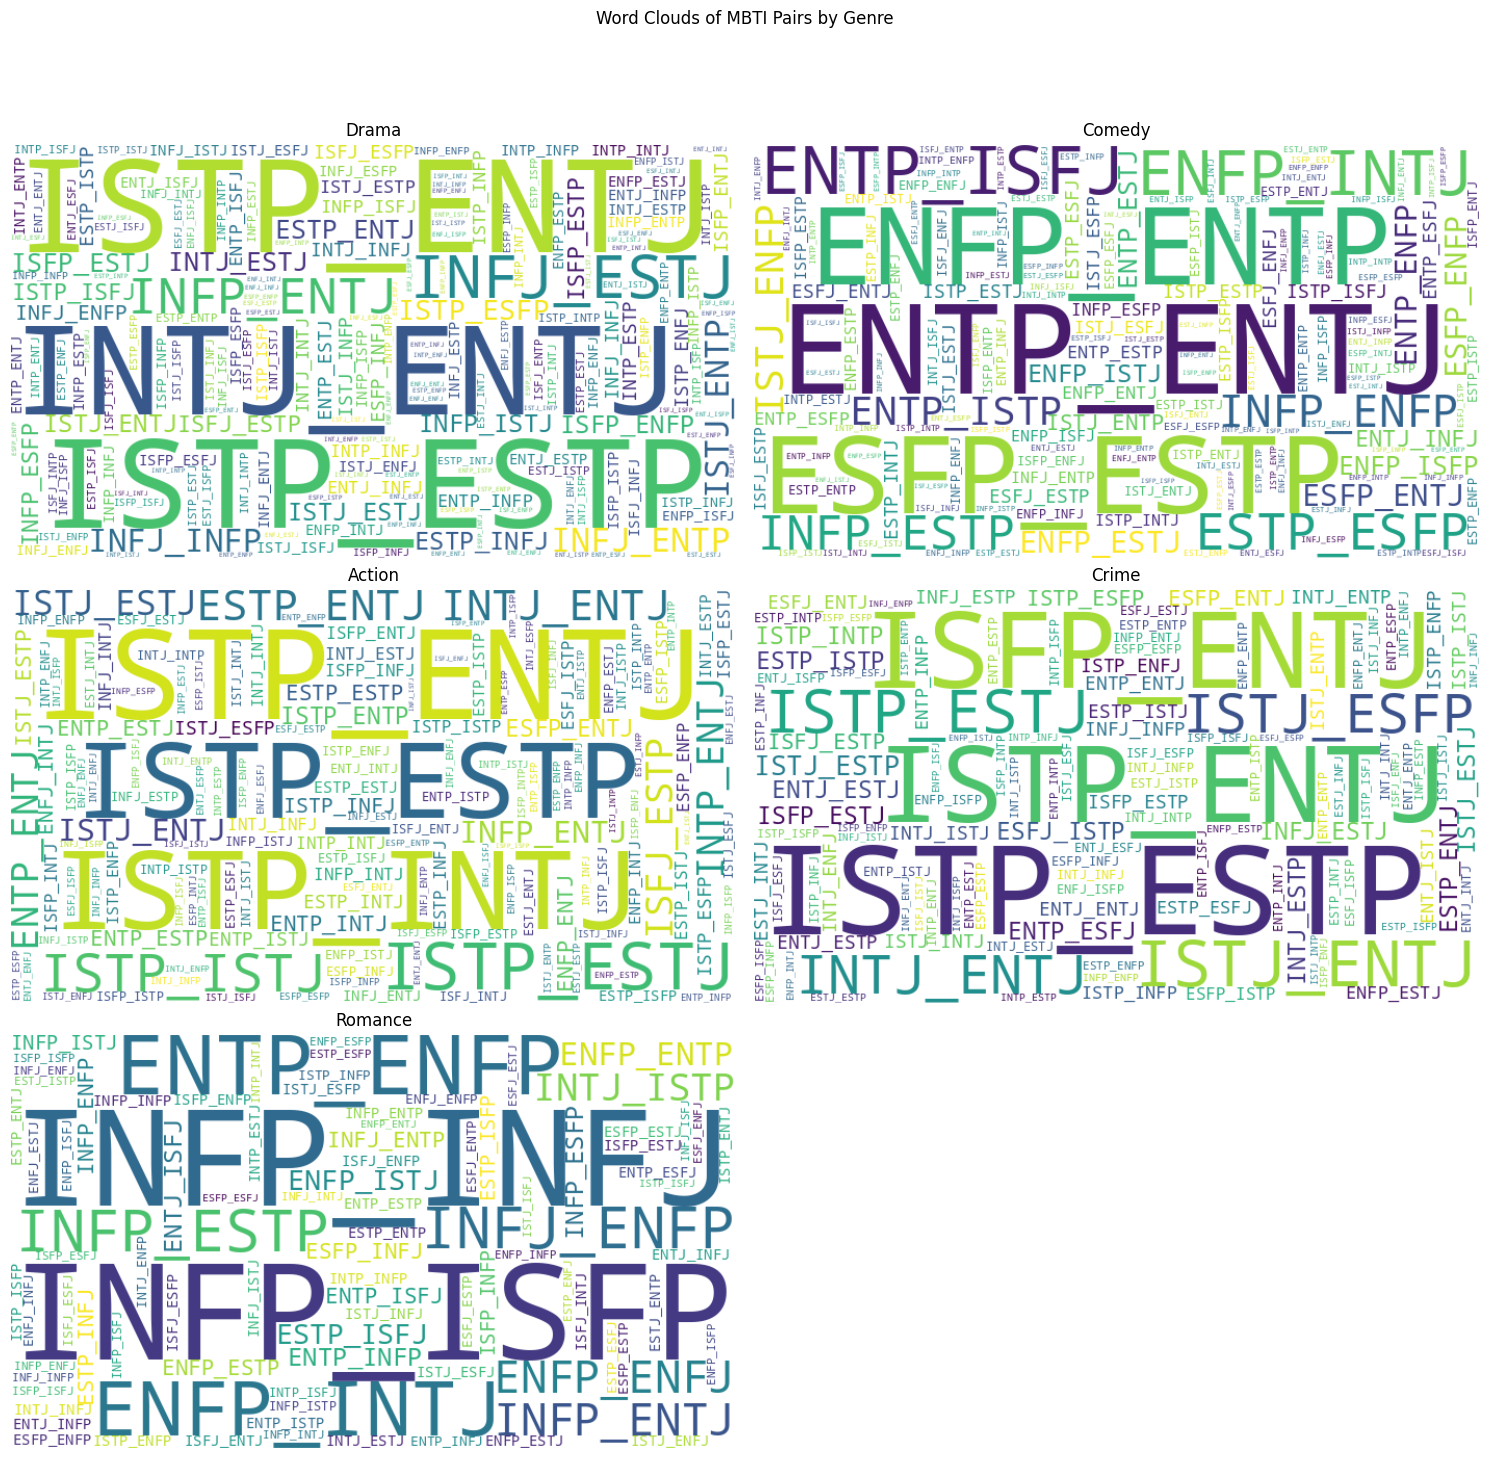

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the genres you want to analyze
genres_to_analyze = ['Drama', 'Comedy', 'Action', 'Crime', 'Romance']

# Set up a 3x2 grid for subplots (3 rows, 2 columns)
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Word Clouds of MBTI Pairs by Genre')

# Flatten the 3x2 axes array for easier iteration
axs = axs.flatten()

# Loop through each genre and plot
for i, genre in enumerate(genres_to_analyze):
    # Filter the DataFrame for the specific genre
    genre_df = genredf_exploded[genredf_exploded['genres'] == genre]

    # Combine all 'MBTI_pair' values into a single string for the word cloud
    mbti_pairs_text = " ".join(genre_df['MBTI_pair'].dropna())

    # Check if there's any text to generate the word cloud
    if mbti_pairs_text.strip():
        # Generate the word cloud
        wordcloud = WordCloud(width=700, height=400, background_color='white').generate(mbti_pairs_text)

        # Display the word cloud
        axs[i].imshow(wordcloud, interpolation='bilinear')
        axs[i].axis('off')
        axs[i].set_title(genre)
    else:
        # If no data, display a placeholder message
        axs[i].text(0.5, 0.5, 'No Data Available', fontsize=14, ha='center', va='center')
        axs[i].axis('off')
        axs[i].set_title(genre)

# Hide the last empty subplot if there are fewer genres than grid spaces
for j in range(len(genres_to_analyze), len(axs)):
    axs[j].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


# TIME

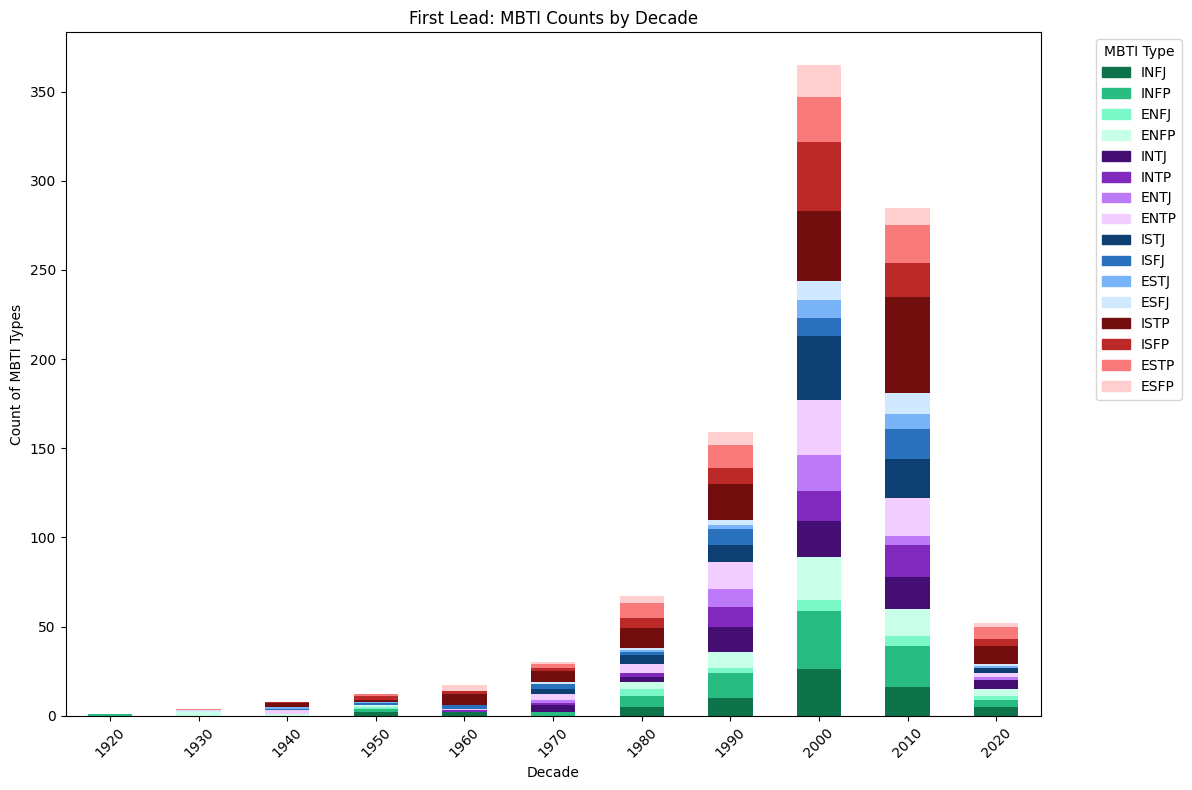

In [20]:
#first lead's over the years mbti change analysis coming up aheaddd

# Step 1: Create a new DataFrame without modifying the original
timedf = df.copy()

# Step 2: Extract decade from the startyear
timedf['decade'] = (timedf['startyear'] // 10) * 10

# Step 3: Group by decade and lead_MBTI to count occurrences
mbti_counts = timedf.groupby(['decade', 'lead_MBTI']).size().unstack(fill_value=0)

# Step 4: Reorder columns to match the colour mapping
ordered_columns = [mbti for mbti in colour_mapping.keys() if mbti in mbti_counts.columns]
mbti_counts_ordered = mbti_counts[ordered_columns]

# Step 5: Create a color palette based on the colour_mapping
color_palette = [colour_mapping[mbti] for mbti in ordered_columns]

# Step 6: Create the stacked bar chart
ax = mbti_counts_ordered.plot(kind='bar', stacked=True, figsize=(12, 8), color=color_palette)

# Adding labels and title
plt.title('First Lead: MBTI Counts by Decade')
plt.xlabel('Decade')
plt.ylabel('Count of MBTI Types')

# Custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=colour_mapping[mbti]) for mbti in colour_mapping.keys() if mbti in ordered_columns]
plt.legend(handles, colour_mapping.keys(), title='MBTI Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

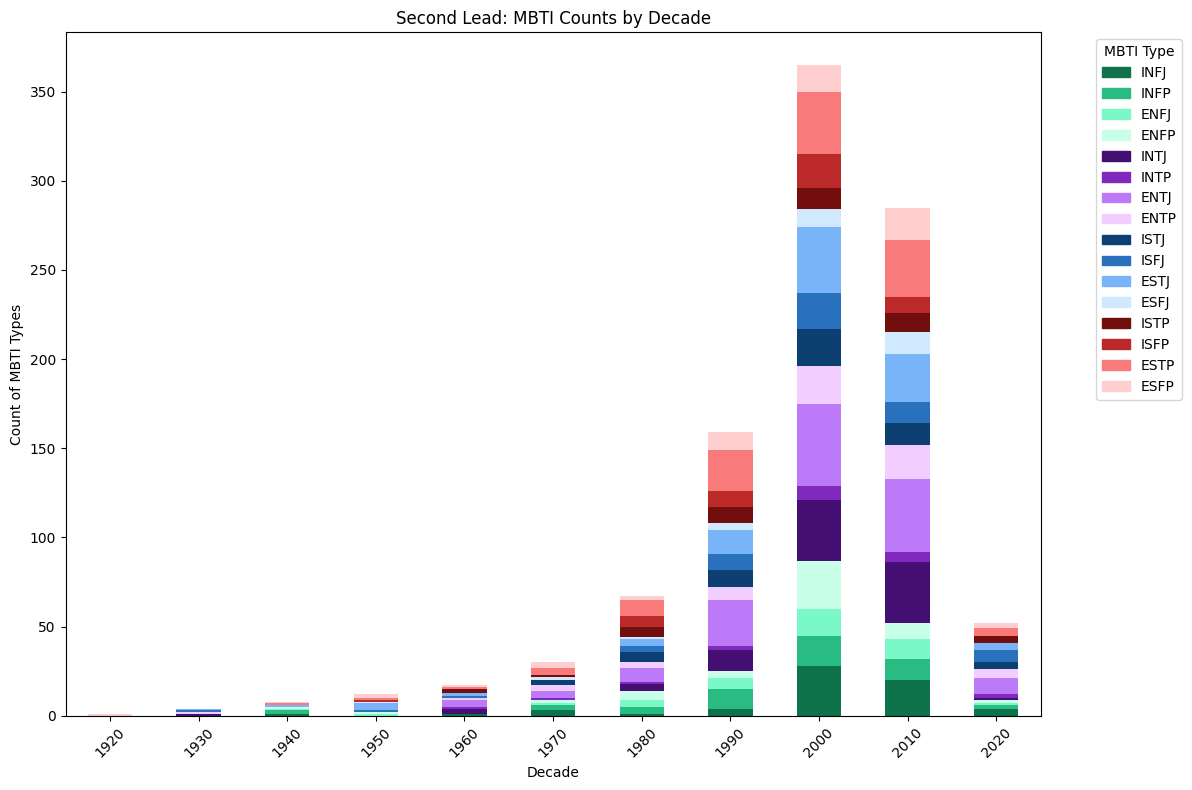

In [21]:
#now moving onto the second lead lol

# Step 1: Create a new DataFrame without modifying the original
timedf = df.copy()

# Step 2: Extract decade from the startyear
timedf['decade'] = (timedf['startyear'] // 10) * 10

# Step 3: Group by decade and lead_MBTI to count occurrences
mbti_counts = timedf.groupby(['decade', 'secondlead_MBTI']).size().unstack(fill_value=0)

# Step 4: Reorder columns to match the colour mapping
ordered_columns = [mbti for mbti in colour_mapping.keys() if mbti in mbti_counts.columns]
mbti_counts_ordered = mbti_counts[ordered_columns]

# Step 5: Create a color palette based on the colour_mapping
color_palette = [colour_mapping[mbti] for mbti in ordered_columns]

# Step 6: Create the stacked bar chart
ax = mbti_counts_ordered.plot(kind='bar', stacked=True, figsize=(12, 8), color=color_palette)

# Adding labels and title
plt.title('Second Lead: MBTI Counts by Decade')
plt.xlabel('Decade')
plt.ylabel('Count of MBTI Types')

# Custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color=colour_mapping[mbti]) for mbti in colour_mapping.keys() if mbti in ordered_columns]
plt.legend(handles, colour_mapping.keys(), title='MBTI Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

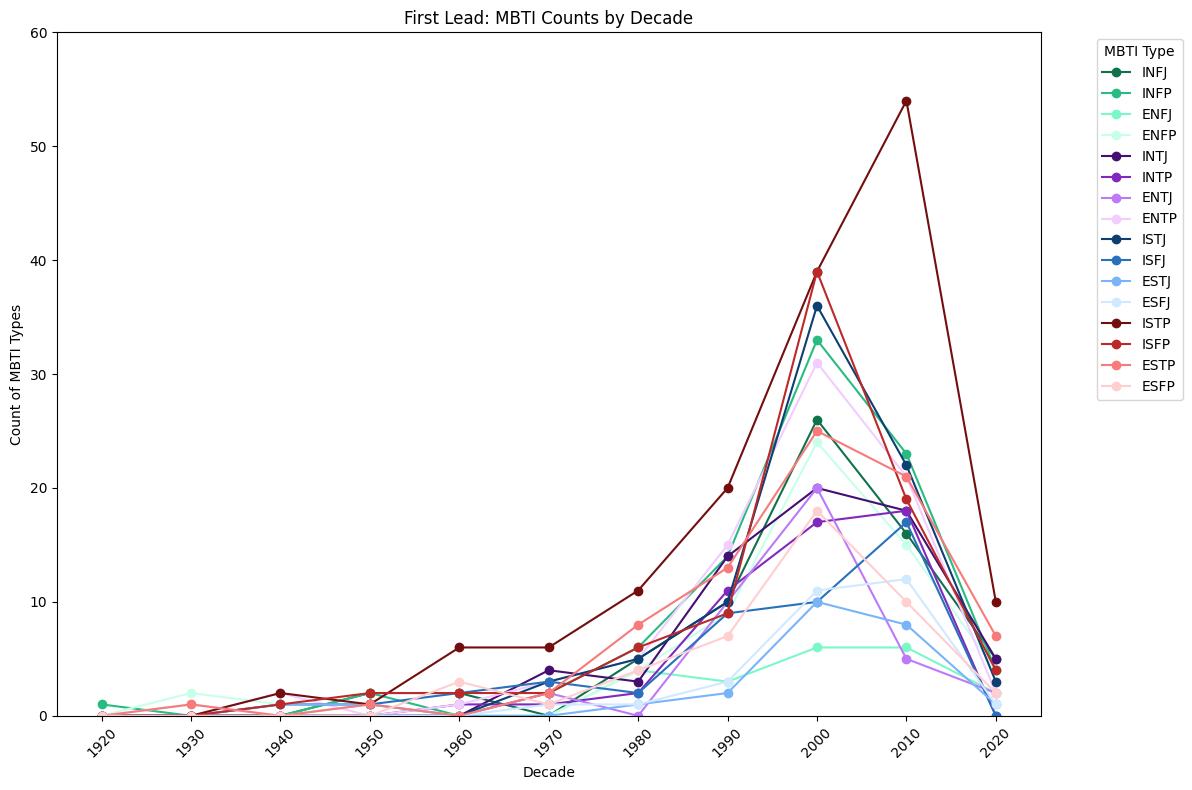

In [22]:
# okay so i feel like a line chart would better explain the changes than a stacked bar chart so imma mess around with that

# Step 1: Create a new DataFrame without modifying the original
timedf = df.copy()

# Step 2: Extract decade from the startyear
timedf['decade'] = (timedf['startyear'] // 10) * 10

# Step 3: Group by decade and lead_MBTI to count occurrences
mbti_counts = timedf.groupby(['decade', 'lead_MBTI']).size().unstack(fill_value=0)

# Step 4: Reorder columns to match the colour mapping
ordered_columns = [mbti for mbti in colour_mapping.keys() if mbti in mbti_counts.columns]
mbti_counts_ordered = mbti_counts[ordered_columns]

# Step 5: Create a color palette based on the colour_mapping
color_palette = [colour_mapping[mbti] for mbti in ordered_columns]

# Step 6: Create the line chart
plt.figure(figsize=(12, 8))
for mbti in mbti_counts_ordered.columns:
    plt.plot(mbti_counts_ordered.index, mbti_counts_ordered[mbti], marker='o', color=colour_mapping[mbti], label=mbti)

# Adding labels and title
plt.title('First Lead: MBTI Counts by Decade')
plt.xlabel('Decade')
plt.ylabel('Count of MBTI Types')
plt.xticks(mbti_counts_ordered.index, rotation=45)
plt.ylim(0,60)

# Custom legend
plt.legend(title='MBTI Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

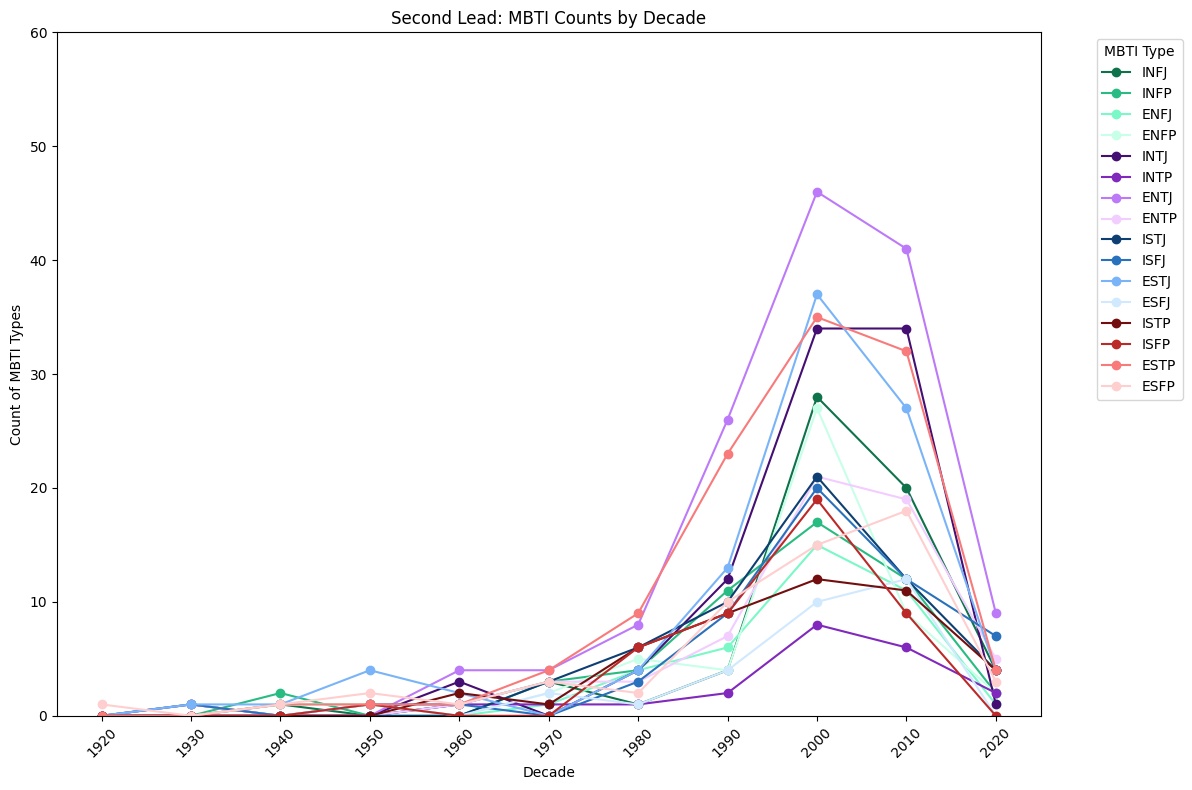

In [23]:
# okay so i feel like a line chart would better explain the changes than a stacked bar chart so imma mess around with that

# Step 1: Create a new DataFrame without modifying the original
timedf = df.copy()

# Step 2: Extract decade from the startyear
timedf['decade'] = (timedf['startyear'] // 10) * 10

# Step 3: Group by decade and lead_MBTI to count occurrences
mbti_counts = timedf.groupby(['decade', 'secondlead_MBTI']).size().unstack(fill_value=0)

# Step 4: Reorder columns to match the colour mapping
ordered_columns = [mbti for mbti in colour_mapping.keys() if mbti in mbti_counts.columns]
mbti_counts_ordered = mbti_counts[ordered_columns]

# Step 5: Create a color palette based on the colour_mapping
color_palette = [colour_mapping[mbti] for mbti in ordered_columns]

# Step 6: Create the line chart
plt.figure(figsize=(12, 8))
for mbti in mbti_counts_ordered.columns:
    plt.plot(mbti_counts_ordered.index, mbti_counts_ordered[mbti], marker='o', color=colour_mapping[mbti], label=mbti)

# Adding labels and title
plt.title('Second Lead: MBTI Counts by Decade')
plt.xlabel('Decade')
plt.ylabel('Count of MBTI Types')
plt.xticks(mbti_counts_ordered.index, rotation=45)
plt.ylim(0,60)

# Custom legend
plt.legend(title='MBTI Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

# RUNTIME

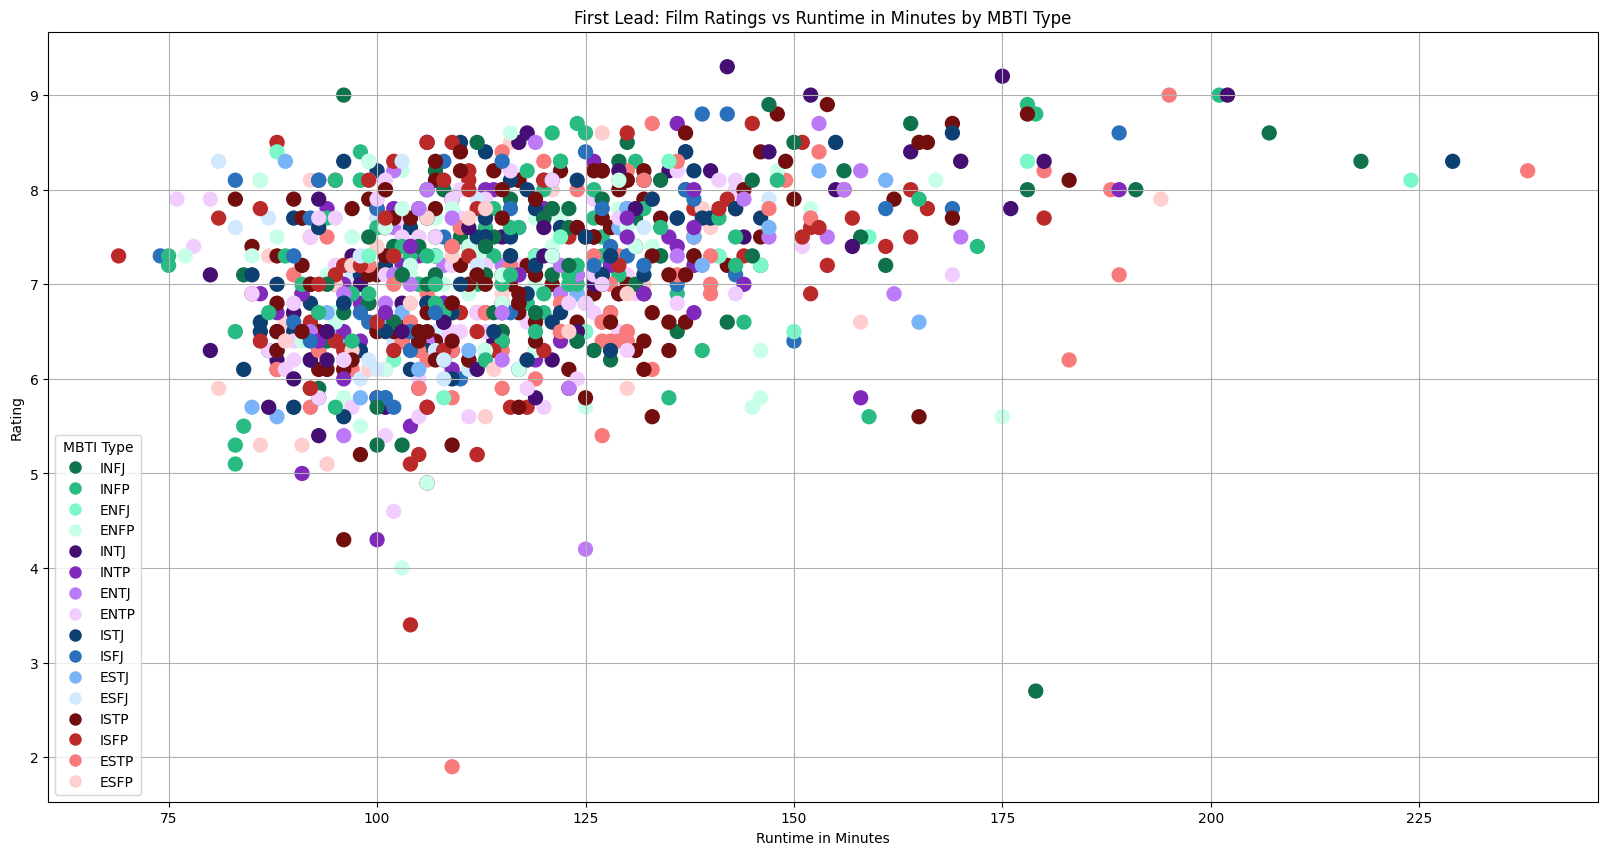

In [24]:
plt.figure(figsize=(20,10))
plt.scatter(data=df,x='runtimeminutes',y='averagerating',c=df['lead_colour'].values,s=100)

plt.title('First Lead: Film Ratings vs Runtime in Minutes by MBTI Type')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Rating')

#just me making a custom legend don't mind me :3
handles = [plt.Line2D([0], [0], marker='o', color='w', label=mbti, markerfacecolor=colour_mapping[mbti], markersize=10) for mbti in colour_mapping.keys()]
plt.legend(handles=handles, title='MBTI Type')

plt.grid(True)
plt.show()

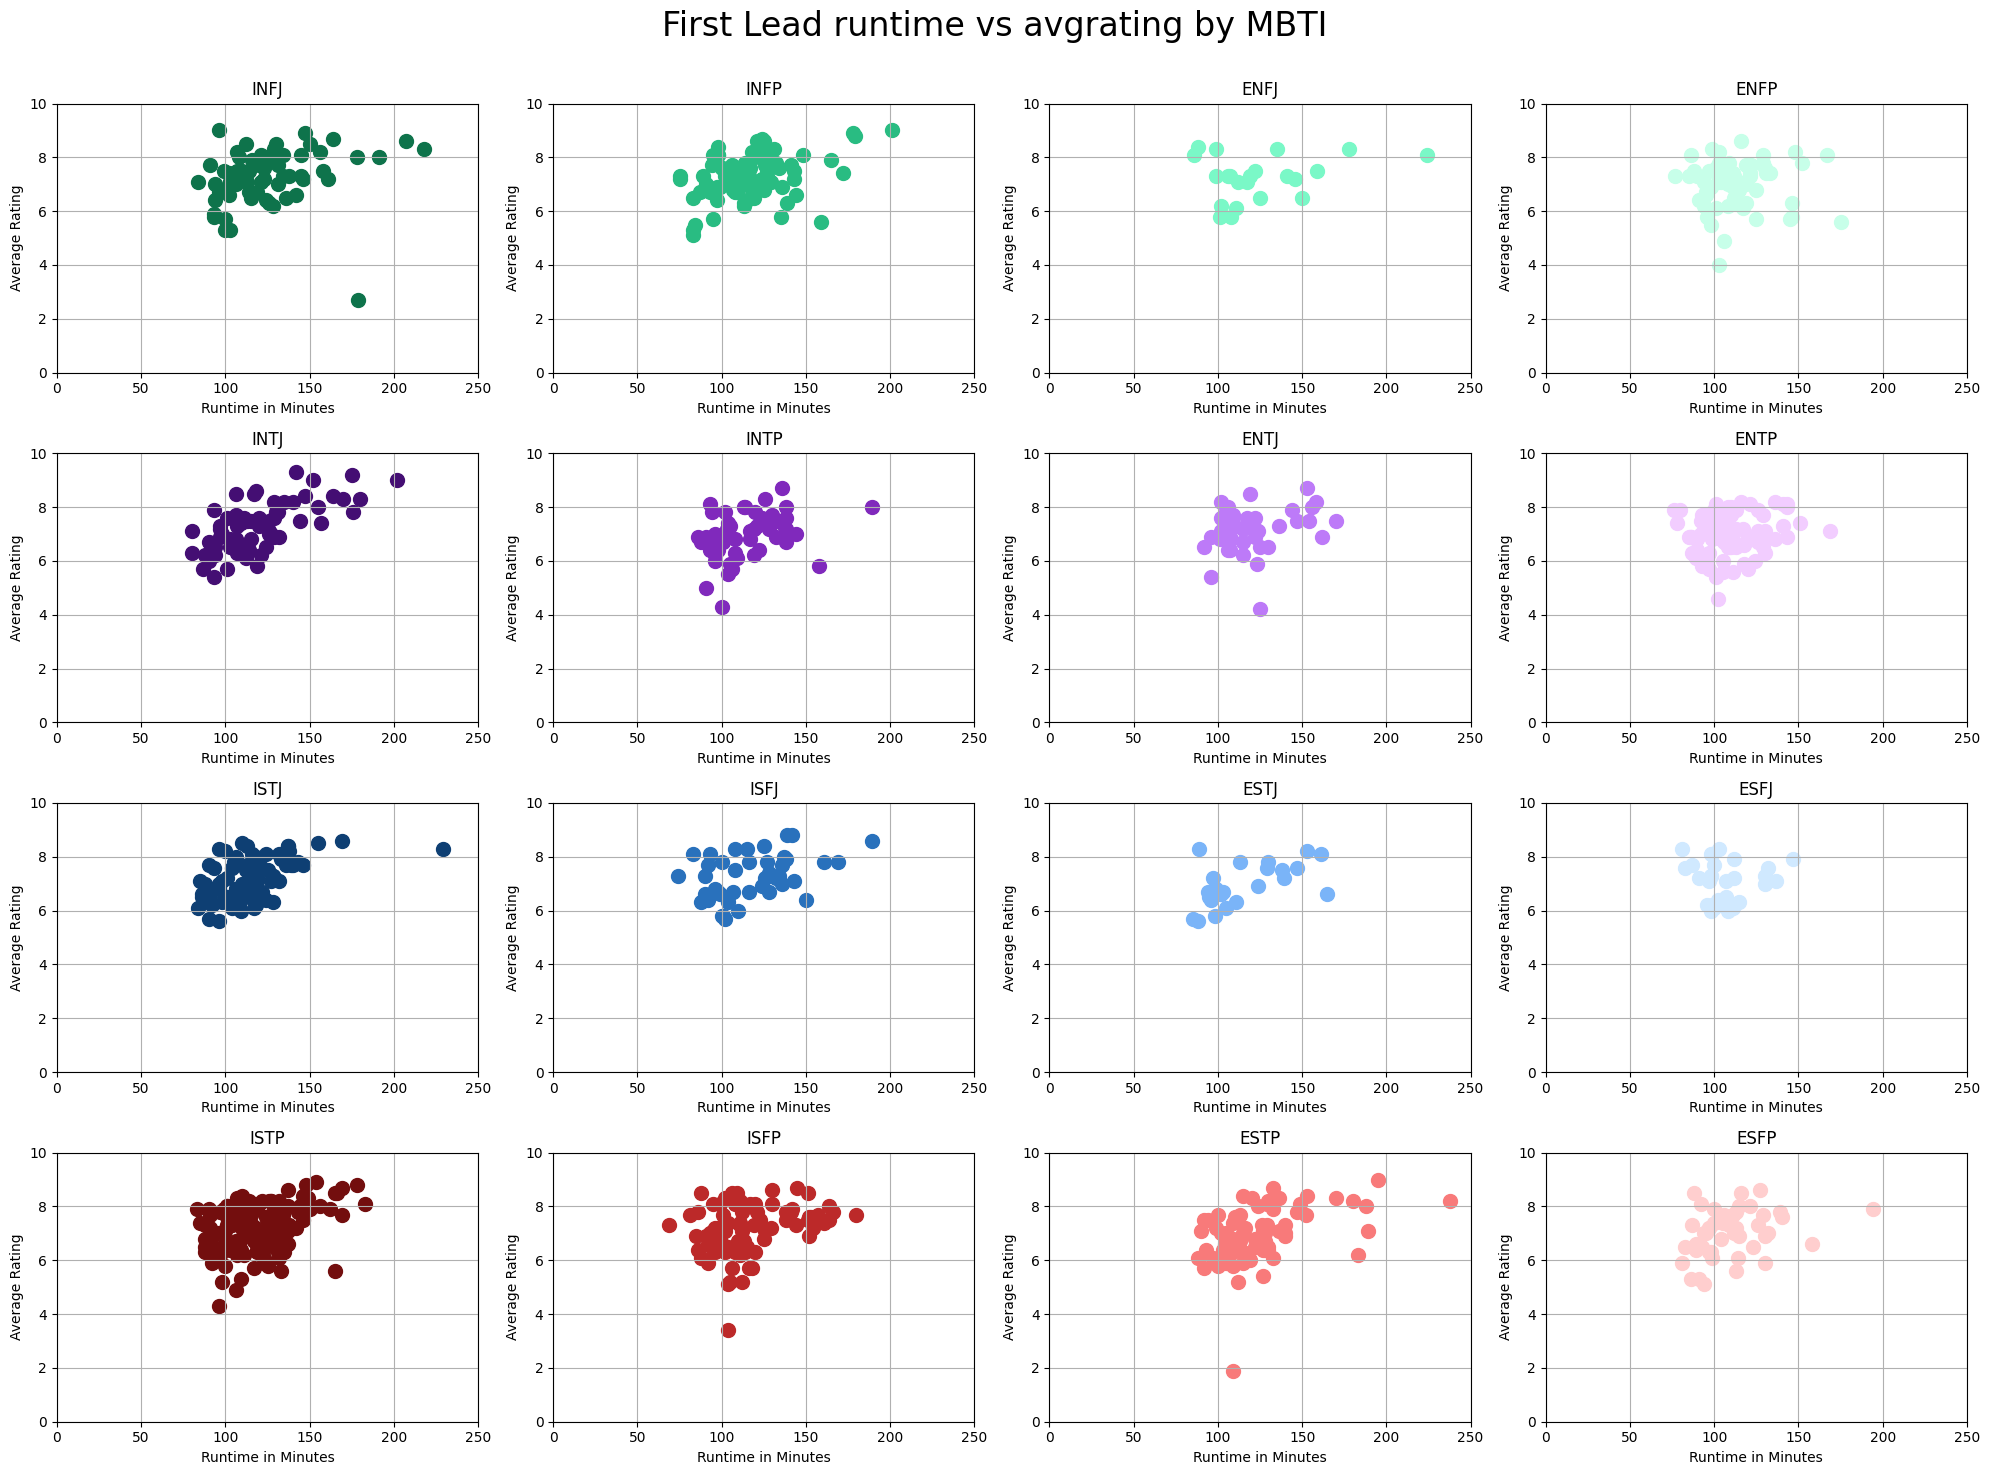

In [25]:
#now i'll create individual subplots for the first lead to see individual trends since it's so damn cluttered in the first one fr

# Create subplots
num_plots = len(colour_mapping)
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

fig.suptitle('First Lead runtime vs avgrating by MBTI\n', fontsize=24)

# Generate scatter plots for each MBTI type
for idx, (mbti, color) in enumerate(colour_mapping.items()):
    subset = df[df['lead_MBTI'] == mbti]

    # If there are no points for this MBTI type, continue
    if subset.empty:
        continue

    axs[idx].scatter(subset['runtimeminutes'], subset['averagerating'], c=color, s=100)
    axs[idx].set_title(mbti)
    axs[idx].set_xlabel('Runtime in Minutes')
    axs[idx].set_ylabel('Average Rating')
    axs[idx].grid(True)
    axs[idx].set_xlim(0, 250)
    axs[idx].set_ylim(0,10)

# Adjust layout
plt.tight_layout()
plt.show()

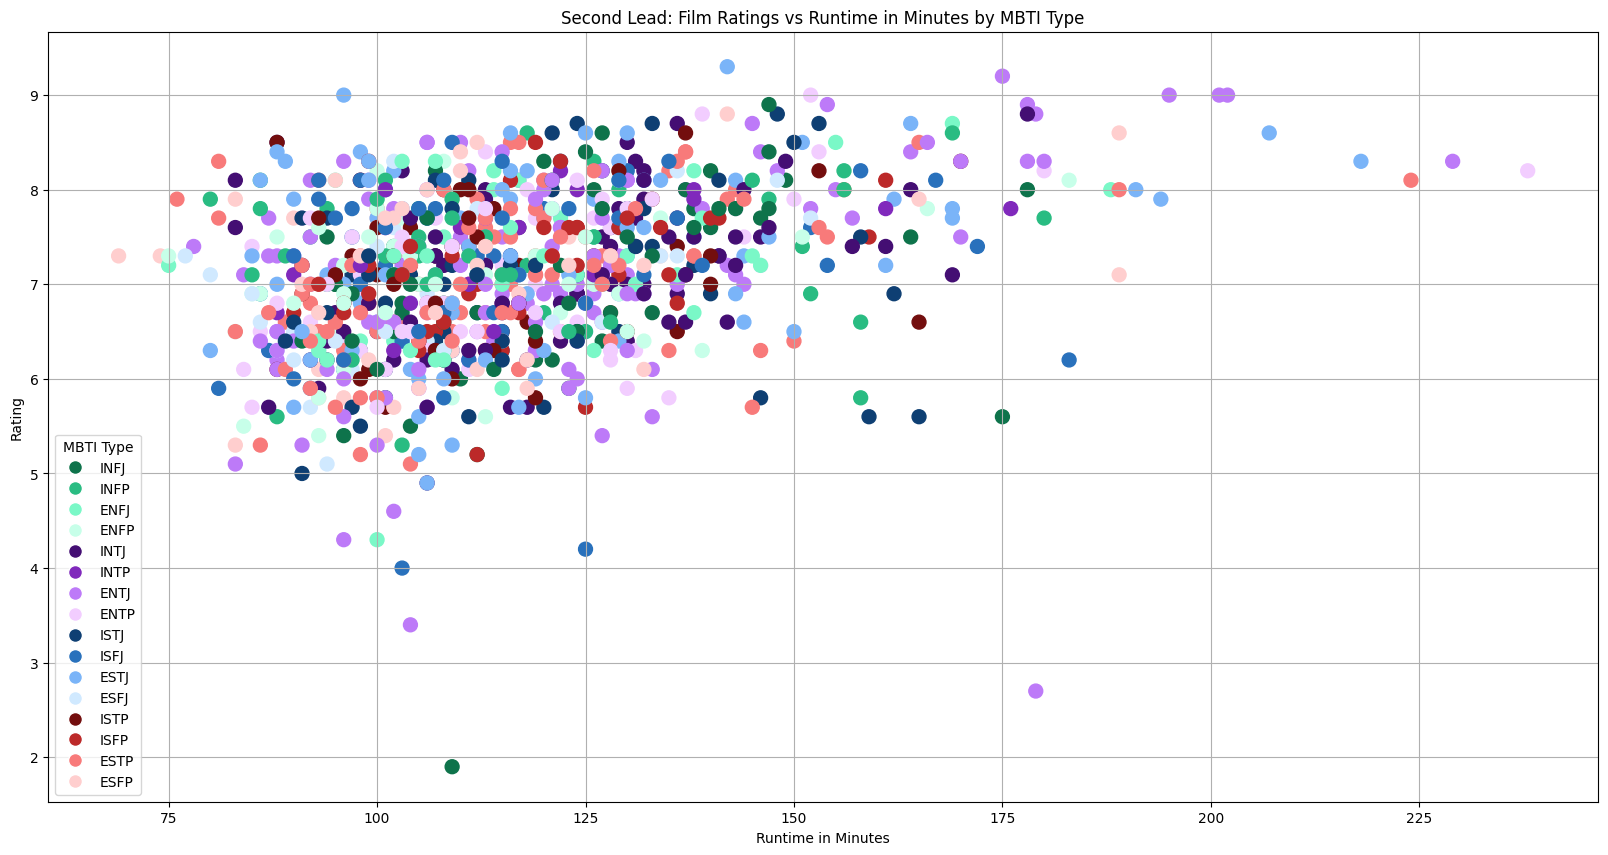

In [26]:
plt.figure(figsize=(20,10))
plt.scatter(data=df,x='runtimeminutes',y='averagerating',c=df['secondlead_colour'].values,s=100)

plt.title('Second Lead: Film Ratings vs Runtime in Minutes by MBTI Type')
plt.xlabel('Runtime in Minutes')
plt.ylabel('Rating')

#just me making a custom legend don't mind me :3
handles = [plt.Line2D([0], [0], marker='o', color='w', label=mbti, markerfacecolor=colour_mapping[mbti], markersize=10) for mbti in colour_mapping.keys()]
plt.legend(handles=handles, title='MBTI Type')

plt.grid(True)
plt.show()

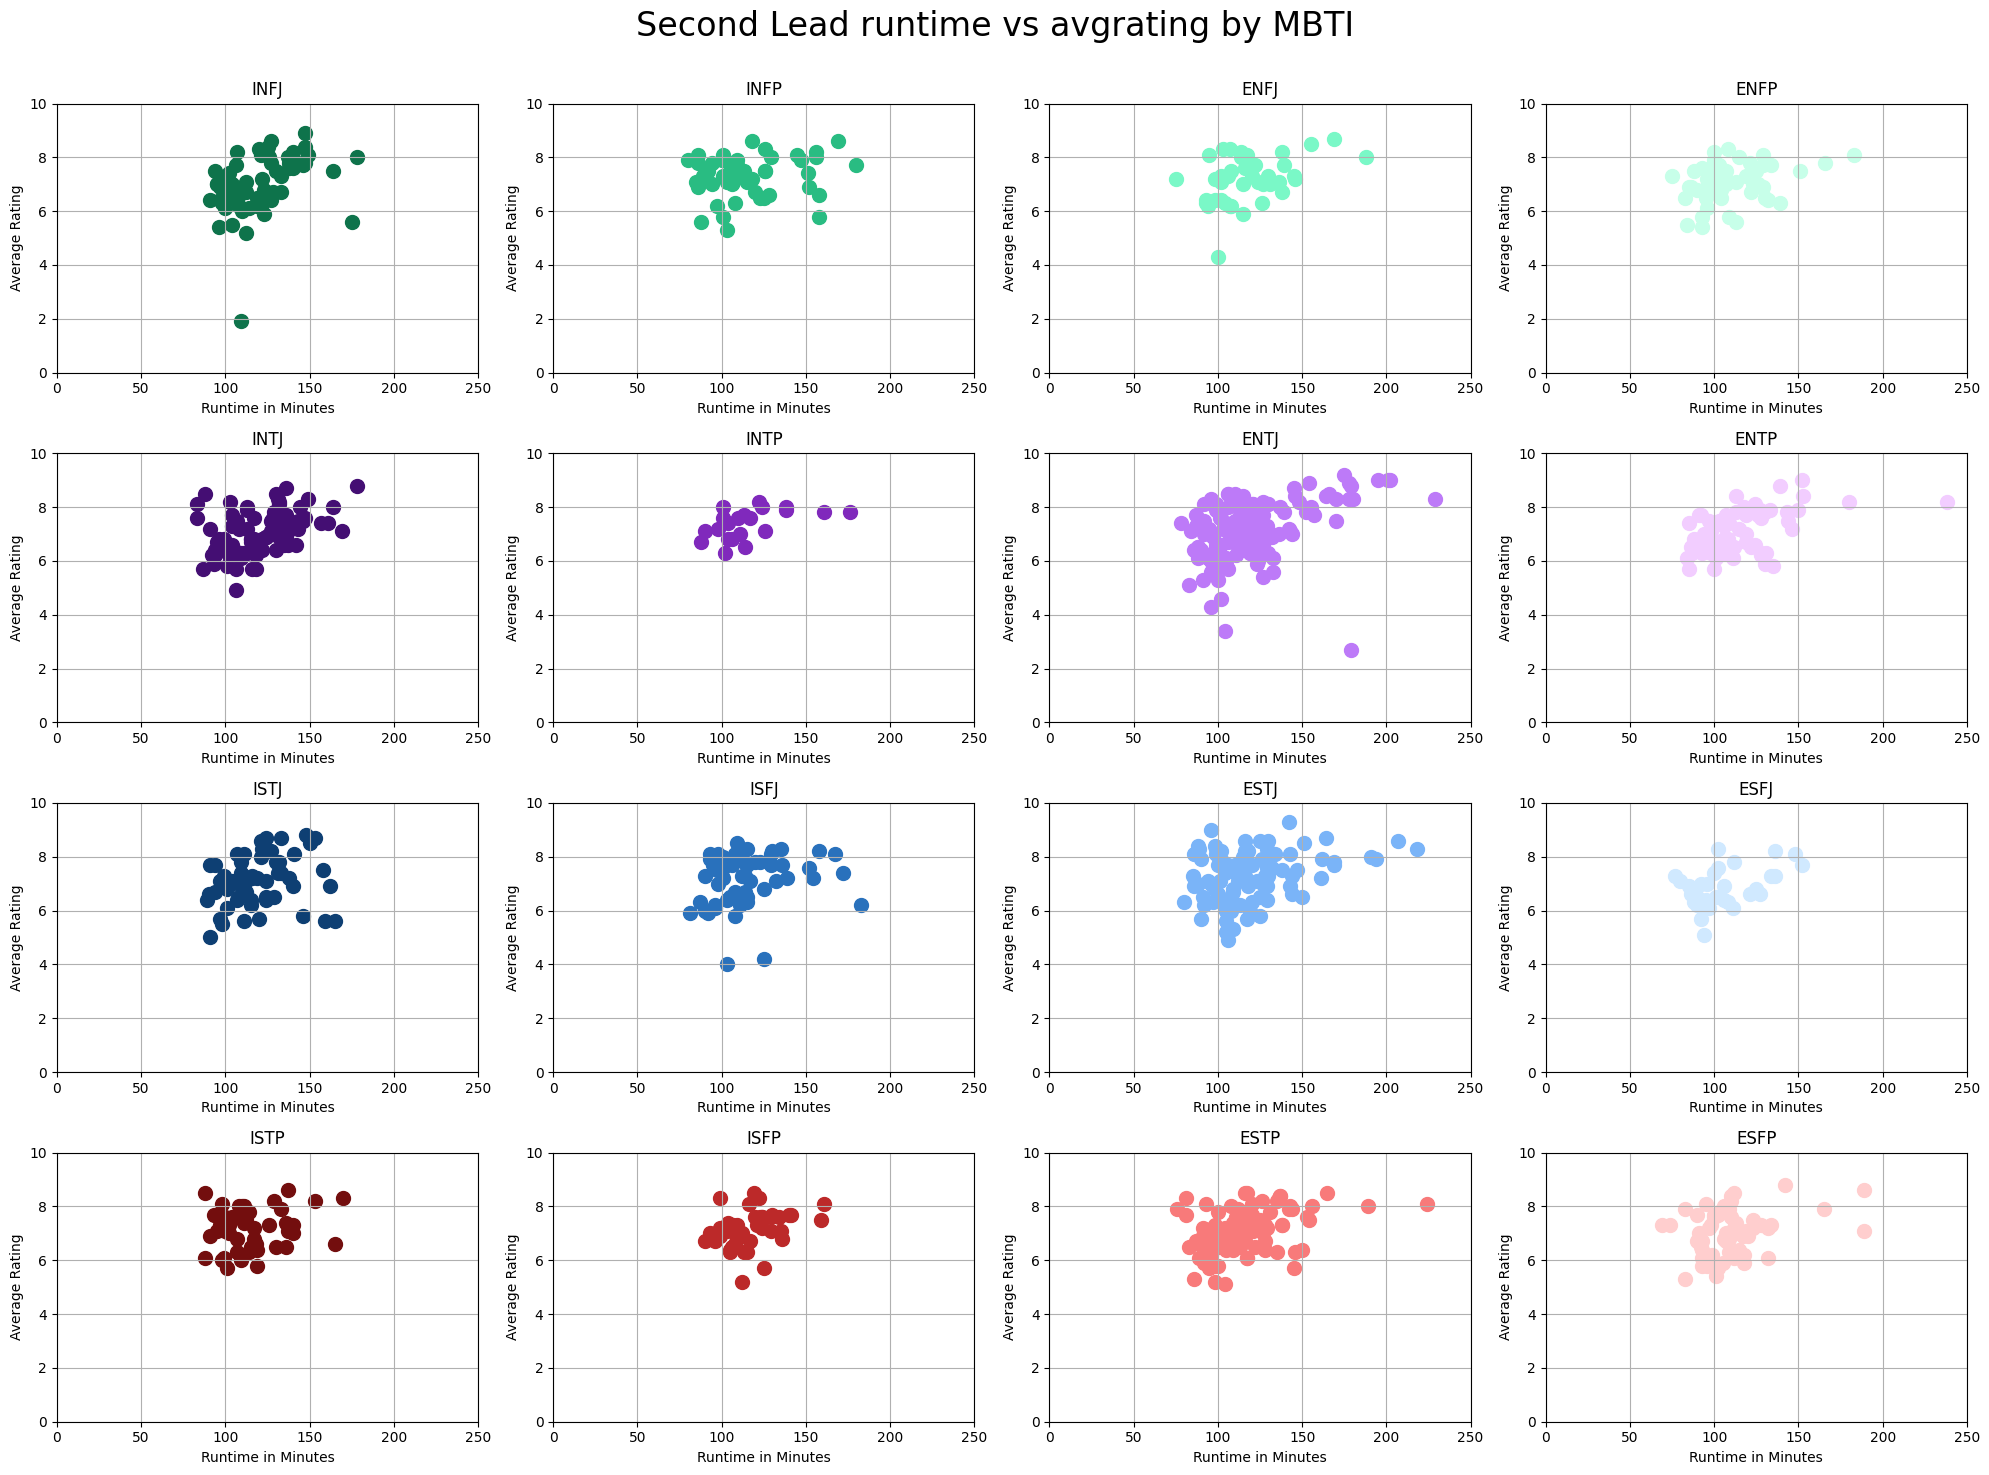

In [27]:
#now i'll create individual subplots for the first lead to see individual trends since it's so damn cluttered in the first one fr

# Create subplots
num_plots = len(colour_mapping)
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

fig.suptitle('Second Lead runtime vs avgrating by MBTI\n', fontsize=24)

# Generate scatter plots for each MBTI type
for idx, (mbti, color) in enumerate(colour_mapping.items()):
    subset = df[df['secondlead_MBTI'] == mbti]

    # If there are no points for this MBTI type, continue
    if subset.empty:
        continue

    axs[idx].scatter(subset['runtimeminutes'], subset['averagerating'], c=color, s=100)
    axs[idx].set_title(mbti)
    axs[idx].set_xlabel('Runtime in Minutes')
    axs[idx].set_ylabel('Average Rating')
    axs[idx].grid(True)
    axs[idx].set_xlim(0, 250)
    axs[idx].set_ylim(0,10)

# Adjust layout
plt.tight_layout()
plt.show()